# eBOSS v6 Analyses

Aug 28: project to 2D

In [3]:
from glob import glob

In [4]:
cats = glob('/home/mehdi/data/eboss/v6*/eBOSS_QSO_clustering_*_v6*.dat.fits')
cats

['/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnn_abv2.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnn_p.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnz_abv2.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnz_p.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnn_abv2.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnn_p.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnz_abv2.dat.fits',
 '/home/mehdi/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnz_p.dat.fits',
 '/home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_NGC_v6.dat.fits',
 '/home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_SGC_v6.dat.fits',
 '/home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_NGC_v6_zelnet.dat.fits',
 '/home/mehdi/data/eboss/v6_elnet/eBOSS_

In [6]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import LSSutils.catalogs.combinefits as combinefits

camb is not installed!


In [14]:
for cat_i in cats:
    cat_o = cat_i.replace('.fits', '.hp256.fits')
    #print(cat_o)
    mycat = combinefits.EBOSSCAT([cat_i], weights=['weight_noz', 'weight_cp', 'weight_systot'])
    mycat.project2hp(nside=256)
    mycat.writehp(cat_o)

len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 125501
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 125501
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 125501
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 125501
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 125501
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj

Aug 27: use ElNet weights

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import numpy as np
from LSSutils.stats import nnbar
import LSSutils.catalogs.combinefits as combinefits
from glob import glob
from LSSutils.utils import radec2hpix
import fitsio as ft
import healpy as hp
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp

snside = str(256)

    
for cap in ['ngc', 'sgc']:
    CAP = cap.upper()
    # z-dependent
    wtag    = 'zelnet'
    outcat  = '/home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_'+CAP+'_v6_'+wtag+'.dat.fits'
    zcuts   = {'low':[0.8,  1.1], 
               'high':[1.1, 2.2]}
    weights = {'low':'/home/mehdi/data/eboss/v6_elnet/nn-weights_'+CAP+'low.hp256.fits',
              'high':'/home/mehdi/data/eboss/v6_elnet/nn-weights_'+CAP+'high.hp256.fits'}
    print('writing %s'%outcat)
    mycat   = combinefits.swap_weights('/home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_'+CAP+'_v6.dat.fits')
    mycat.run(weights, zcuts)
    mycat.to_fits(outcat)
    print(100*'=','\n')

camb is not installed!
writing /home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_NGC_v6_zelnet.dat.fits
going to read /home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_NGC_v6.dat.fits


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


number of objs w zcut [0.8, 1.1] : 36796
number of objs w zcut [1.1, 2.2] : 180097

writing /home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_SGC_v6_zelnet.dat.fits
going to read /home/mehdi/data/eboss/v6_elnet/eBOSS_QSO_clustering_SGC_v6.dat.fits
number of objs w zcut [0.8, 1.1] : 20835
number of objs w zcut [1.1, 2.2] : 104666



Aug 22: ablation with 10 chains

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/rezaie/github/LSSutils')
import numpy as np
from LSSutils.stats import nnbar
import LSSutils.catalogs.combinefits as combinefits
from glob import glob
from LSSutils.utils import radec2hpix
import fitsio as ft
import healpy as hp
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp

snside = str(256)

for ab in ['abv2']:    
    for cap in ['ngc', 'sgc']:
        CAP = cap.upper()
        # z-dependent
        wtag    = '_'.join(('wnnz', ab))
        outcat  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6_'+wtag+'.dat.fits'
        zcuts   = {'low':[0.8, 1.508088732762684], 
                   'high':[1.508088732762684, 2.2]}
        weights = {'low':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.low/regression/nn_'+ab+'/nn-weights.hp'+snside+'.fits',
                  'high':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.high/regression/nn_'+ab+'/nn-weights.hp'+snside+'.fits'}
        print('writing %s'%outcat)
        mycat   = combinefits.swap_weights('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6.dat.fits')
        mycat.run(weights, zcuts)
        mycat.to_fits(outcat)
        # all
        wtag    = '_'.join(('wnn', ab))
        outcat  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6_'+wtag+'.dat.fits'        
        zcuts   = {'all':[0.8, 2.2]}
        weights = {'all':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.all/regression/nn_'+ab+'/nn-weights.hp'+snside+'.fits'}
        print('writing %s'%outcat)
        mycat   = combinefits.swap_weights('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6.dat.fits')
        mycat.run(weights, zcuts) 
        mycat.to_fits(outcat)
        print(100*'=','\n')

camb is not installed!
writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnz_abv2.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits


/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


number of objs w zcut [0.8, 1.508088732762684] : 108446
number of objs w zcut [1.508088732762684, 2.2] : 108446
writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnn_abv2.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits
number of objs w zcut [0.8, 2.2] : 216893

writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnz_abv2.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
number of objs w zcut [0.8, 1.508088732762684] : 61579
number of objs w zcut [1.508088732762684, 2.2] : 63922
writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnn_abv2.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
number of objs w zcut [0.8, 2.2] : 125501



Aug 21: ablation results

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import sys
sys.path.append('/Users/rezaie/github/LSSutils')
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp as labels
from LSSutils.dataviz import *

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
import fitsio as ft

In [7]:
d = ft.read('/Volumes/TimeMachine/data/eboss/v6/ngal_features_ngc.all.fits')

In [13]:
dpd = pd.DataFrame(d['features'].byteswap().newbyteorder(), columns=labels)

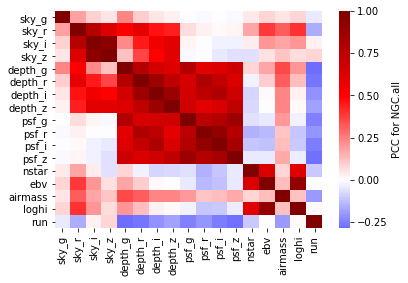

In [22]:
sns.heatmap(dpd.corr(), cmap=plt.cm.seismic, center=0.0,cbar_kws={'label':'PCC for NGC.all'})
plt.savefig('corrmax_ngc_all.pdf', bbox_inches='tight')

In [ ]:
data = pd.read_hdf('/Volumes/TimeMachine/data/eboss/v6/')

87.10727890280934 -28.89233171965322
104.35923973977302 -15.94171769164543
128.18709500938442 -13.644081532266927
97.45140616539194 -13.549141515033503
96.26321335464371 -8.59962652896562


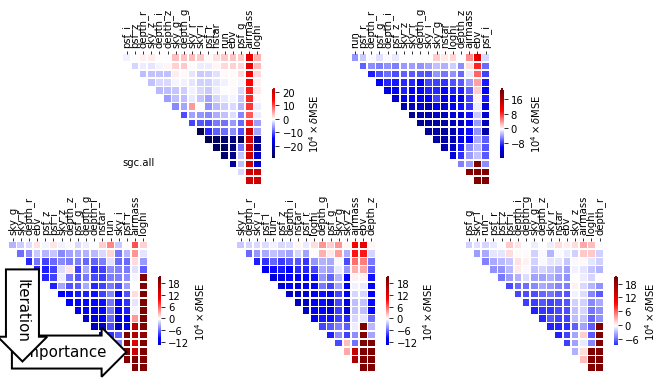

74.48840744896712 -4.589144012558943
110.3394959405235 -5.894784993184521
110.67363911379191 -5.71532499100913
87.2665227427194 -9.018966062818157
110.01695010853796 -7.405589455636852


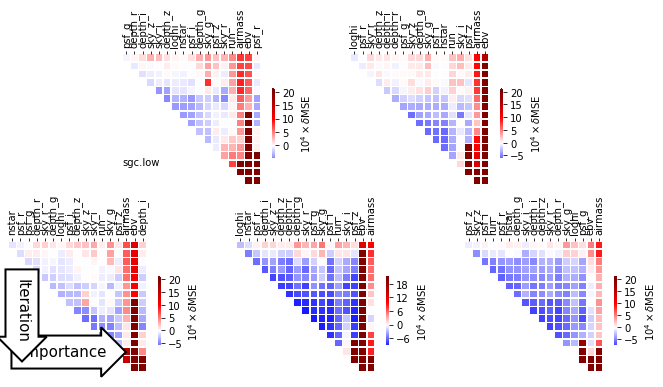

36.98778069433972 -7.6147487675548575
26.467034341173257 -5.7951679868095685
31.036458078548268 -17.495772317672742
30.406447894943955 -11.148473805375758
17.42106805584509 -7.838209199161339


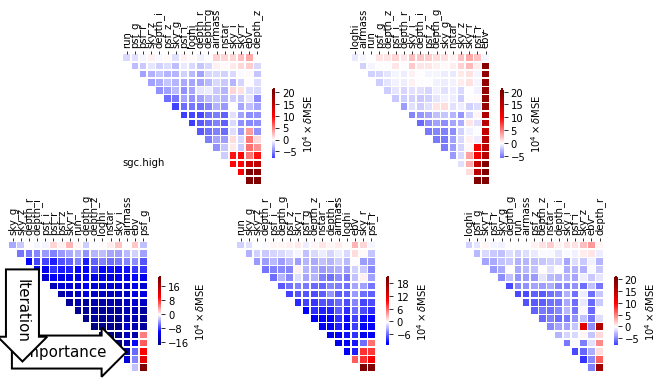

30.59339640387959 -12.645554845076568
52.58170597778555 -5.643582880355824
30.0167598152834 -10.412343834037552
43.5184002133071 -3.9238639985073043
46.60838279134438 -7.587566111717514


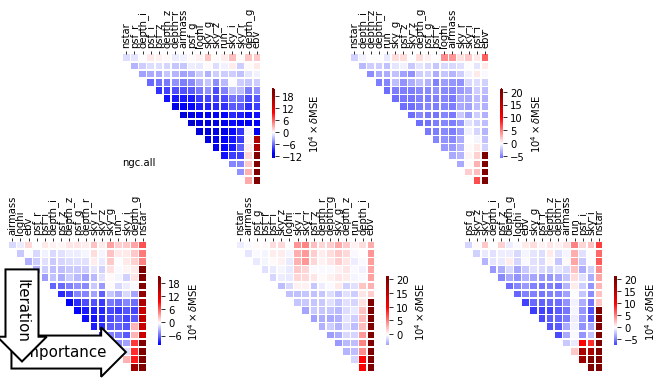

38.18084192096283 -7.328285102802257
14.859694732405337 -9.388002720904787
14.631581819715134 -10.315643813968434
23.550814794979225 -7.2573988134871925
19.73765145721451 -9.833008594133386


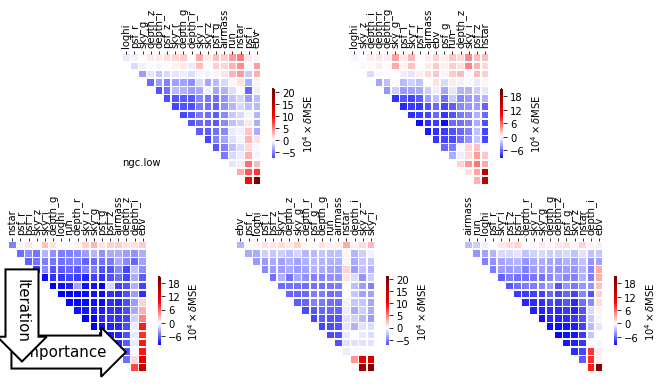

15.316720614433343 -10.092733827313793
4.602854018946889 -12.873280299577905
20.74947149152795 -7.496787591363407
6.287610240616193 -12.096704747999176
7.476309107232737 -11.56447871889732


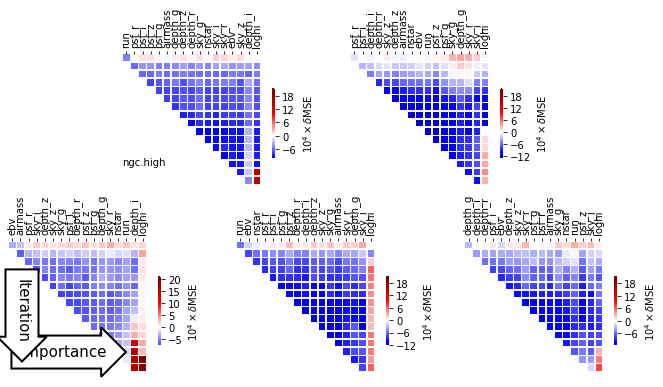

In [4]:
for cap in ['sgc', 'ngc']:    
    for k in ['all', 'low', 'high']:
        ttl = '.'.join((cap, k))
        ablation_plot_all(glob('/Volumes/TimeMachine/data/eboss/v6/results_'+ttl+'/ablationv2/v6.log_fold*.npy'), 
                          labels=labels,
                         title=ttl,
                         hold=False,
                         saveto=ttl+'.pdf')
plt.show()

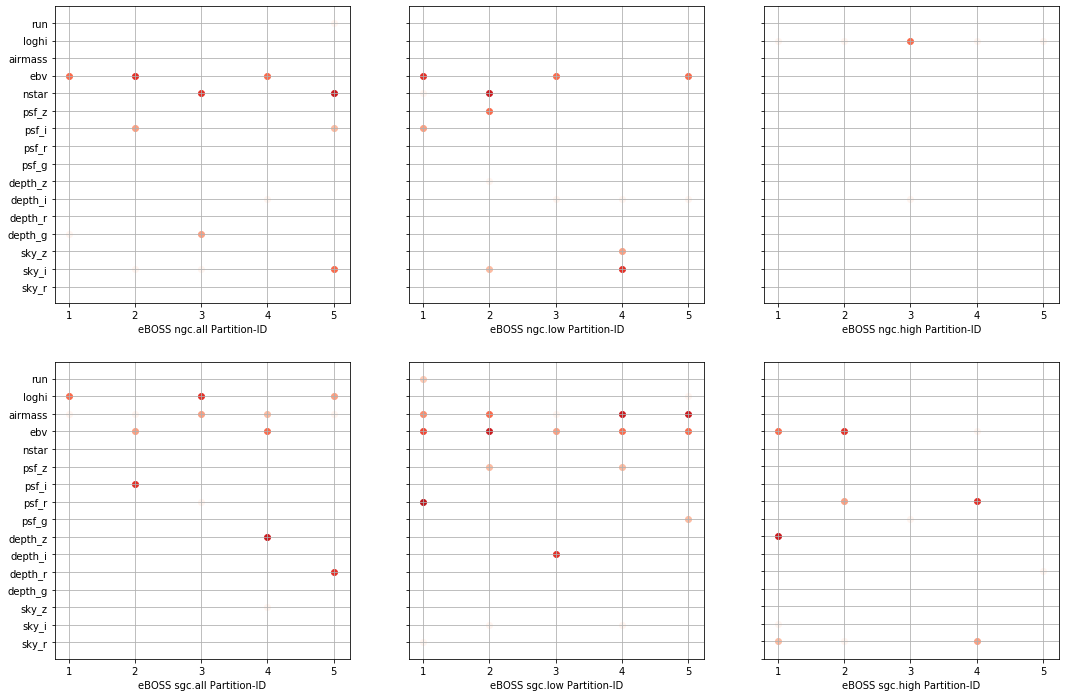

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 12), sharey=True)
ax = ax.flatten()

i = 0
for cap in [ 'ngc', 'sgc']: # ngc.all
    for key in ['all', 'low', 'high']:
        mycap = cap+'.'+key
        get_selected_maps(glob('/Volumes/TimeMachine/data/eboss/v6/results_'+mycap+'/ablationv2/v6.log_fold*.npy'),
                          ['eBOSS '+mycap], labels=labels, ax=ax[i], hold=True)
        i += 1
plt.savefig('./maps_selected_eboss.pdf', bbox_inches='tight')
plt.show()

Aug 20: replace the systot weights with the nn weights

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import healpy as hp
import fitsio as ft
import numpy as np

['/Volumes/TimeMachine/data/eboss/v6/results_ngc.all/regression/nn_ab/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_ngc.all/regression/nn_p/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_ngc.high/regression/nn_ab/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_ngc.high/regression/nn_p/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_ngc.low/regression/nn_ab/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_ngc.low/regression/nn_p/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_sgc.all/regression/nn_ab/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_sgc.all/regression/nn_p/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_sgc.high/regression/nn_ab/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_sgc.high/regression/nn_p/nn-weights256.fits', '/Volumes/TimeMachine/data/eboss/v6/results_sgc.low/regression/nn_ab/nn-weights256.fits', '/Volumes/

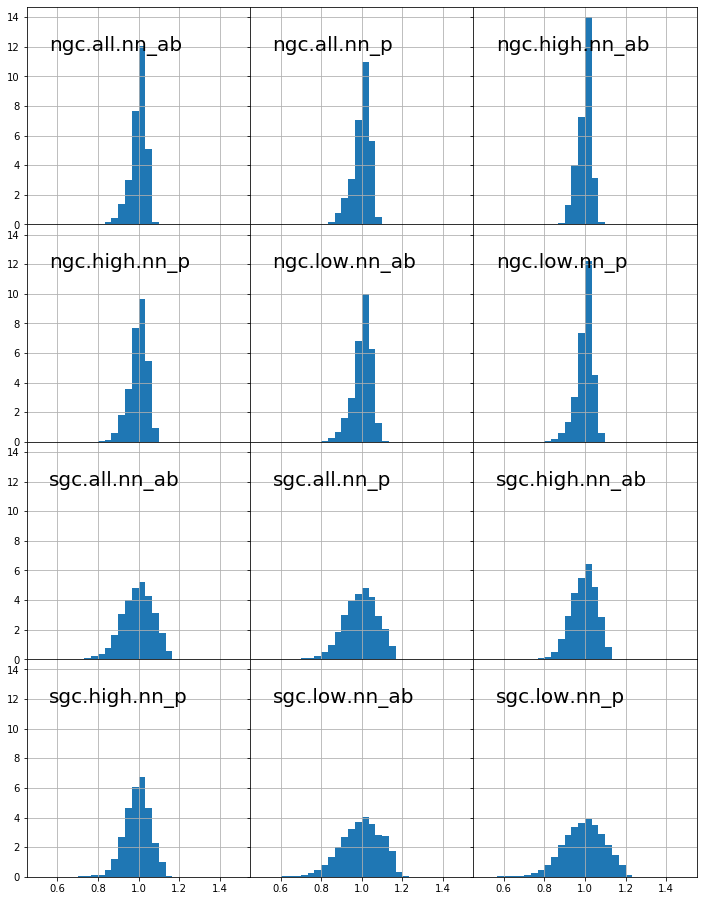

In [2]:
wmaps = glob('/Volumes/TimeMachine/data/eboss/v6/results_*/regression/nn_*/nn-weights256.fits')
print(wmaps, len(wmaps))

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(12, 16), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
ax = ax.flatten()
for i,wm in enumerate(wmaps):
    #hpm = hp.read_map(wm, verbose=False)
    hpf = ft.read(wm)['weight']
    hpm = np.median(hpf, axis=1)

    name = '.'.join((wm.split('/')[6][8:], wm.split('/')[8]))
    print(name, hpm.min(), hpm.max())    
    ax[i].hist(hpm, range=(0.5, 1.5), bins=30, density=True)
    ax[i].text(0.1, 0.8, name, transform=ax[i].transAxes, fontsize=20)
    if i==13:ax[i].set_xlabel('weight NN')
    ax[i].grid()
    #ax[i].set_yscale('log')
    #ax[i].set_ylim(0.4, 1.e6)

In [4]:
import sys
sys.path.append('/Users/rezaie/github/LSSutils')

In [5]:
from LSSutils.dataviz import hyper_params_data

In [6]:
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp as labels

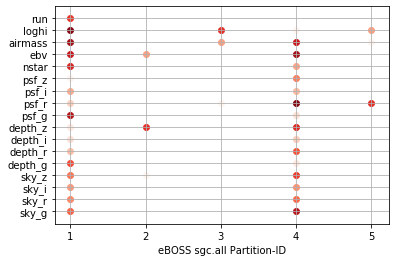

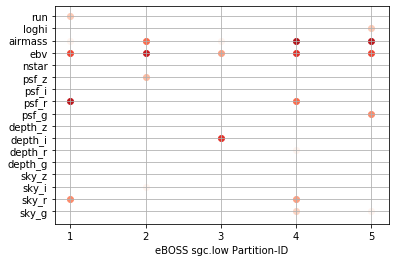

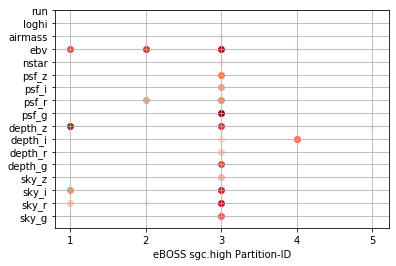

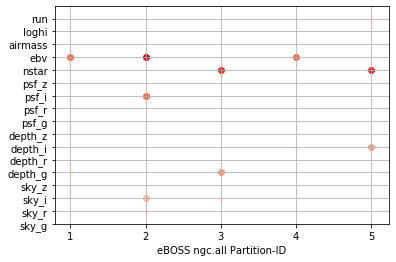

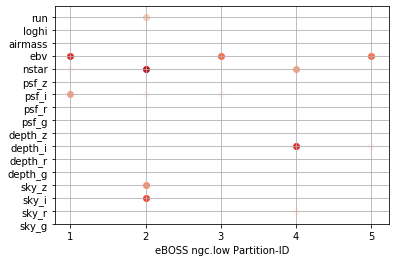

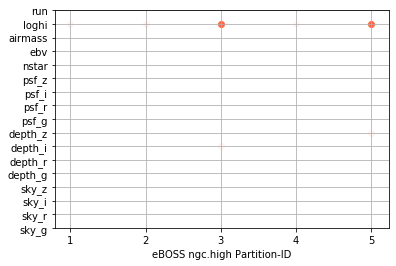

In [7]:
for cap in ['sgc', 'ngc']: # ngc.all
    for key in ['all', 'low', 'high']:
        mycap = cap+'.'+key
        hyper_params_data(glob('/Volumes/TimeMachine/data/eboss/v6/results_'+mycap+'/ablation/v6.log_fold*.npy'), ['eBOSS '+mycap], labels=labels)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/rezaie/github/LSSutils')
import numpy as np
from LSSutils.stats import nnbar
import LSSutils.catalogs.combinefits as combinefits
from glob import glob
from LSSutils.utils import radec2hpix
import fitsio as ft
import healpy as hp
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp

snside = str(256)

for ab in ['p', 'ab']:    
    for cap in ['ngc', 'sgc']:
        CAP = cap.upper()
        # z-dependent
        wtag    = '_'.join(('wnnz', ab))
        outcat  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6_'+wtag+'.dat.fits'
        zcuts   = {'low':[0.8, 1.508088732762684], 
                   'high':[1.508088732762684, 2.2]}
        weights = {'low':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.low/regression/nn_'+ab+'/nn-weights.hp'+snside+'.fits',
                  'high':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.high/regression/nn_'+ab+'/nn-weights.hp'+snside+'.fits'}
        print('writing %s'%outcat)
        mycat   = combinefits.swap_weights('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6.dat.fits')
        mycat.run(weights, zcuts)
        mycat.to_fits(outcat)
        # all
        wtag    = '_'.join(('wnn', ab))
        outcat  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6_'+wtag+'.dat.fits'        
        zcuts   = {'all':[0.8, 2.2]}
        weights = {'all':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.all/regression/nn_'+ab+'/nn-weights.hp'+snside+'.fits'}
        print('writing %s'%outcat)
        mycat   = combinefits.swap_weights('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6.dat.fits')
        mycat.run(weights, zcuts) 
        mycat.to_fits(outcat)
        print(100*'=','\n')

writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnz_p.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits
number of objs w zcut [0.8, 1.508088732762684] : 108446
number of objs w zcut [1.508088732762684, 2.2] : 108446
writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnn_p.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits
number of objs w zcut [0.8, 2.2] : 216893

writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnz_p.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
number of objs w zcut [0.8, 1.508088732762684] : 61579
number of objs w zcut [1.508088732762684, 2.2] : 63922
writing /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnn_p.dat.fits
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
number of objs w zcut [0.8, 2.2] : 125501

wr

## Aug 19 NSIDE 256

In [4]:
import os
home = os.getenv("HOME")
import matplotlib.pyplot as plt
import fitsio as ft
import healpy as hp
import numpy as np
import sys
sys.path.append(home + '/github/LSSutils')
import LSSutils.stats.nnbar as nnbar
import LSSutils.utils as utils
import LSSutils.catalogs.combinefits as cb
import pandas as pd
from LSSutils.extrn.GalacticForegrounds.hpmaps import logHI, gaia_dr2
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp
from time import time

scratch = '/home/mehdi/data'

## prepare for NN

In [2]:
t0 = time()

dataframe = pd.read_hdf('/Volumes/TimeMachine/data/eboss/sysmaps/SDSS_HI_imageprop_nside256.h5')
my_cols   = cols_eboss_v6_qso_simp
zcuts     = {'all':[0.8, 2.2], 'low':[0.8, 1.508088732762684], 'high':[1.508088732762684, 2.2]}
nside     = 256
snside    = str(nside)
#
for cap in ['ngc', 'sgc']:
    catalogs = []
    for key_i in zcuts.keys():
        myframe  = dataframe.copy()
        
        CAP      = cap.upper()
        mytag    = cap+'.'+key_i
        fitname  = '/Volumes/TimeMachine/data/eboss/v6/ngal_features_ngc.fits'.replace('ngc',   mytag)
        fitkfld  = '/Volumes/TimeMachine/data/eboss/v6/qso.ngc.hp.'+snside+'.r.npy'
        fitkfld  = fitkfld.replace('ngc', mytag)
        hpfrac   = '/Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.hp.'+snside+'.fits'
        hpfrac   = hpfrac.replace('ngc', mytag)
        hpmask   = '/Volumes/TimeMachine/data/eboss/v6/mask.ngc.hp.'+snside+'.fits'
        hpmask   = hpmask.replace('ngc', mytag)        
        catname  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits'.replace('NGC', CAP)
        ranname  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits'.replace('NGC', CAP)
        
        mycat    = cb.EBOSSCAT([catname])    
        mycat.apply_zcut(zcuts[key_i])
        mycat.project2hp(nside=nside)
        myframe['ngal'] = mycat.galm.astype('f8')

        myran    = cb.EBOSSCAT([ranname])    
        myran.apply_zcut(zcuts[key_i])
        myran.project2hp(nside=nside)
        myranhp = myran.galm.astype('f8')
        myranhp[myranhp==0.] = np.nan
        myframe['nran'] = myranhp
        

        myfit    = myframe.dropna()
        print('shape myfit {} {} {}'.format(cap, key_i, myfit.shape))
        #print(fitname, fitkfld, hpfrac, catname, hpmask, end=3*'\n')
        cb.hd5_2_fits(myfit, my_cols, fitname, hpmask, hpfrac, fitkfld, res=nside, k=5)
        print(10*'=', end=3*'\n')

print(time()-t0)

len of gal cats 1
num of gal obj 216893
going to apply z-cuts : [0.8, 2.2]
num of gal obj after cut 216893
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 5565871
going to apply z-cuts : [0.8, 2.2]
num of gal obj after cut 5565871
projecting into a healpix map with nside of 256
shape myfit ngc all (60650, 19)
wrote /Volumes/TimeMachine/data/eboss/v6/ngal_features_ngc.all.fits
wrote /Volumes/TimeMachine/data/eboss/v6/mask.ngc.all.hp.256.fits
wrote /Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.all.hp.256.fits
wrote /Volumes/TimeMachine/data/eboss/v6/qso.ngc.all.hp.256.r.npy


len of gal cats 1
num of gal obj 216893
going to apply z-cuts : [0.8, 1.508088732762684]
num of gal obj after cut 108446
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 5565871
going to apply z-cuts : [0.8, 1.508088732762684]
num of gal obj after cut 2783456
projecting into a healpix map with nside of 256
shape myfit ngc low (60594, 19)
wrote /Volum

In [16]:
from scipy.stats import pearsonr
from glob import glob

. . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . 


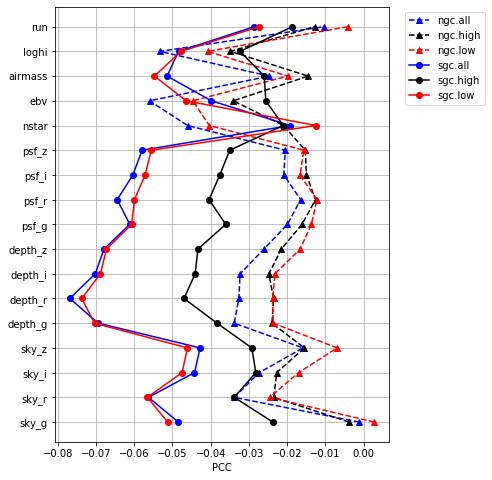

In [18]:
files =  glob('/Volumes/TimeMachine/data/eboss/v6/*ngal_features*')
#files

pcc_all = {}
for i,file_i in enumerate(files):
    name = file_i.split('/')[-1].split('_')[-1][:-5]
    #print(name)
    data = ft.read(file_i, lower=True)
    feat = data['features'].T
    nlbl = data['label']
    nran = data['fracgood']    
    #ngal = data['label']*data['fracgood']
    #mask = np.ones_like(nran)    
    pcc_mine = []
    for j, sys_j in enumerate(feat):
        pcc_mine.append(pearsonr(sys_j, nlbl)[0])
        print('.', end=' ')
    pcc_all[name] = pcc_mine
    print('')    
    
    
plt.figure(figsize=(6,8))
for name_i in pcc_all.keys():
    #if 'low' in name_i or 'high' in name_i:
    if 'sgc' in name_i:
        marker='o'
        ls='-'
    elif 'ngc' in name_i:
        marker='^'
        ls='--'
    else:
        marker='.'
    if 'low' in name_i:
        color='r'
    elif 'high' in name_i:
        color='k'
    else:
        color='b'
    plt.plot(pcc_all[name_i], cols_eboss_v6_qso_simp, label=name_i, marker=marker, color=color, linestyle=ls)
plt.legend(bbox_to_anchor=(1.3, 1.))
plt.grid()
plt.xlabel('PCC')
plt.show()    

### make sysmaps with lower Nside

In [2]:
def make_symaps():
    ran = ft.read('/Volumes/TimeMachine/data/eboss/sysmaps/eBOSSrandoms.ran.fits', lower=True)
    maps = {'sky_g':ran['skyflux'][:,1],
            'sky_r':ran['skyflux'][:,2],
            'sky_i':ran['skyflux'][:,3],
            'sky_z':ran['skyflux'][:,4],
            'airmass':ran['airmass'],
            'ebv':ran['eb_minus_v'],
            'depth_g':ran['image_depth'][:,1],
            'depth_r':ran['image_depth'][:,2],
            'depth_i':ran['image_depth'][:,3],
            'depth_z':ran['image_depth'][:,4],
            'psf_g':ran['psf_fwhm'][:,1],
            'psf_r':ran['psf_fwhm'][:,2],
            'psf_i':ran['psf_fwhm'][:,3],
            'psf_z':ran['psf_fwhm'][:,4],
            'run':ran['run']}
    t0 = time()
    hpmaps = {}
    for name in maps:
        hpmaps[name] = utils.projectradec2hp(256, ran['ra'], ran['dec'], maps[name])
    print(time()-t0)
    lenz = logHI(nside=256)
    gaia = gaia_dr2(nside=256)
    hpmaps['loghi'] = lenz.loghi
    hpmaps['nstar'] = gaia.gaia
    return pd.DataFrame(hpmaps)

In [3]:
ebossmaps = make_symaps()

65.96749901771545


/Users/rezaie/github/LSSutils/LSSutils/extrn/GalacticForegrounds/hpmaps.py:66: UserWarning: upgrading/downgrading HI column density
  if nside!= nside_in:warnings.warn('upgrading/downgrading HI column density')


In [4]:
ebossmaps.describe().T

count         mean          std         min          25%  \
sky_g    206956.0     1.774910     0.996971    1.072522     1.475848   
sky_r    206956.0     4.365397     1.079180    2.329747     3.636496   
sky_i    206956.0     8.296324     2.068773    3.827954     6.832264   
sky_z    206956.0    25.714275     7.155273    9.357317    20.646813   
airmass  206956.0     1.197649     0.156891    1.001909     1.087357   
ebv      206956.0     0.038651     0.027304    0.003726     0.019996   
depth_g  206956.0     0.506698     0.106405    0.172226     0.432455   
depth_r  206956.0     0.743973     0.155677    0.255582     0.633435   
depth_i  206956.0     1.143431     0.234744    0.459707     0.975420   
depth_z  206956.0     4.594517     0.934888    1.473167     3.926582   
psf_g    206956.0     1.449992     0.191776    0.514188     1.311562   
psf_r    206956.0     1.329170     0.190026    0.446580     1.195766   
psf_i    206956.0     1.260669     0.190405    0.523170     1.126753   
psf_z    206956.0     1.288570     0.176415    0.439662     1.162827   
run      206956.0  4609.938317  2011.970551  308.000000  3179.232558   
loghi    786432.0    20.780529     0.484601   19.688907    20.426476   
nstar    786432.0  1405.987600  1865.734768    0.000000   400.336639   

                 50%          75%           max  
sky_g       1.684826     1.974743    182.036890  
sky_r       4.093197     4.867804     22.216459  
sky_i       7.891988     9.305665     23.886986  
sky_z      24.485395    29.352651     68.167897  
airmass     1.160993     1.251725      1.938120  
ebv         0.031453     0.049458      0.445451  
depth_g     0.490285     0.557047      1.829315  
depth_r     0.717470     0.822351      2.248257  
depth_i     1.106221     1.267865      2.841818  
depth_z     4.438461     5.098101     12.017504  
psf_g       1.433151     1.563795      3.205560  
psf_r       1.314005     1.445834      3.373267  
psf_i       1.245862     1.377780      2.992986  
psf_z       1.275598     1.398765      2.955837  
run      4360.547519  5647.500000   8160.685714  
loghi      20.723631    21.070789     22.369092  
nstar     762.545959  1772.919434  65903.039062

In [5]:
ebossmaps.to_hdf('/Volumes/TimeMachine/data/eboss/sysmaps/SDSS_HI_imageprop_nside256.h5', 'sdss', overwrite=True)

## NSIDE 512

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/rezaie/github/LSSutils')
import LSSutils.utils as utils
import fitsio as ft
import numpy  as np

camb is not installed!


In [2]:
# random = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits')
random = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_full_ALL_v6.ran.fits')
galaxy = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits')

In [3]:
hpix_d = utils.radec2hpix(512, galaxy['RA'], galaxy['DEC'])
hpix_r = utils.radec2hpix(512, random['RA'], random['DEC'])

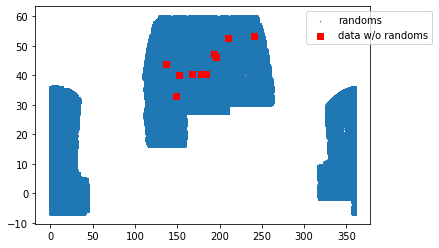

10 pixels have data but not randoms


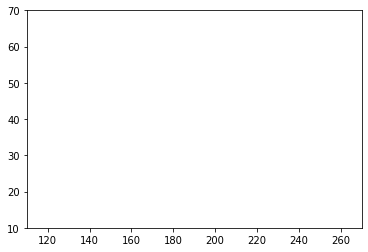

In [4]:
no_avail =(~np.in1d(hpix_d, hpix_r))
plt.scatter(random['RA'], random['DEC'], 1., marker='.', label='randoms')
plt.scatter(galaxy['RA'][no_avail], galaxy['DEC'][no_avail], marker='s', color='r', label='data w/o randoms')
plt.legend(bbox_to_anchor=(1.2, 1.));plt.show()
#plt.axis([110, 270, 10, 70])
print('%d pixels have data but not randoms'%no_avail.sum())

## Aug 14 : swap weights & look at nnbar for low and high-z


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/rezaie/github/LSSutils')
import numpy as np
from LSSutils.stats import nnbar
import LSSutils.catalogs.combinefits as combinefits
from glob import glob
import fitsio as ft
import healpy as hp
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso

zcuts   = {'low':[0.8, 1.508088732762684], 'high':[1.508088732762684, 2.2]}
wtag    = 'wnnz'
for cap in ['ngc', 'sgc']:
    CAP = cap.upper()
    #print(CAP)
    weights = {'low':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.low/regression/nn_ab/nn-weights.hp512.fits',
              'high':'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.high/regression/nn_ab/nn-weights.hp512.fits'}
    mycat = combinefits.swap_weights('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6.dat.fits')
    mycat.run(weights, zcuts)
    mycat.to_fits('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+CAP+'_v6_'+wtag+'.dat.fits')

going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits
number of objs w zcut [0.8, 1.508088732762684] : 108446
number of objs w zcut [1.508088732762684, 2.2] : 108446
going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
number of objs w zcut [0.8, 1.508088732762684] : 61579
number of objs w zcut [1.508088732762684, 2.2] : 63922


In [7]:
d= ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnz.dat.fits')

In [9]:
d

array([( 9.89460795, -6.89494785, 1.5703849 , 0.92679481, 1.07400668, 1., 1.0614837 , 1.57974971e-05,    258),
       ( 9.81722121, -6.90352737, 2.1944339 , 0.9563117 , 1.06224827, 1., 1.05570499, 9.13683226e-06,    259),
       (10.00078749, -6.91423572, 1.85471118, 0.93427369, 1.0933143 , 1., 1.05496758, 1.40700335e-05,    262),
       ...,
       ( 7.80111062, 36.20762965, 1.12520651, 0.9212235 , 0.97504296, 1., 1.05547446, 1.71025824e-05, 451498),
       ( 5.90500159, 36.2368793 , 1.70861768, 0.92600198, 1.00100607, 2., 1.05297618, 1.59822586e-05, 451512),
       ( 5.38973281, 36.17479877, 2.02736767, 0.93956075, 1.00426007, 1., 1.05277822, 1.28654270e-05, 451513)],
      dtype=[('RA', '>f8'), ('DEC', '>f8'), ('Z', '>f8'), ('WEIGHT_FKP', '>f8'), ('WEIGHT_SYSTOT', '>f8'), ('WEIGHT_CP', '>f8'), ('WEIGHT_NOZ', '>f8'), ('NZ', '>f8'), ('QSO_ID', '>i8')])

In [6]:
ls -lt /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering*.dat.fits

-rw-r--r--  1 rezaie  staff   9043200 Aug 14 20:53 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnz.dat.fits
-rw-r--r--  1 rezaie  staff  15624000 Aug 14 20:53 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnz.dat.fits
-rw-r--r--  1 rezaie  staff   9043200 Aug  2 12:42 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnn.dat.fits
-rw-r--r--  1 rezaie  staff   9043200 Aug  2 12:42 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnp.dat.fits
-rw-r--r--  1 rezaie  staff  15624000 Aug  2 12:40 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnn.dat.fits
-rw-r--r--  1 rezaie  staff  15624000 Aug  2 12:40 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnp.dat.fits
-rw-r--r--@ 1 rezaie  staff   9043200 Jul 16 19:48 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
-rw-r--r--@ 1 rezaie  staff  15624000 Jul 16 19:47 /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_

In [77]:
myran = swap_weights('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits')
hpgal = radec2hpix(512, mycat.data['RA'], mycat.data['DEC'])
hpran = radec2hpix(512, myran.data['RA'], myran.data['DEC'])

going to read /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits


In [78]:
np.argwhere(~np.in1d(hpgal, hpran)).flatten().size

30

Text(0.5,0,'weight nn')

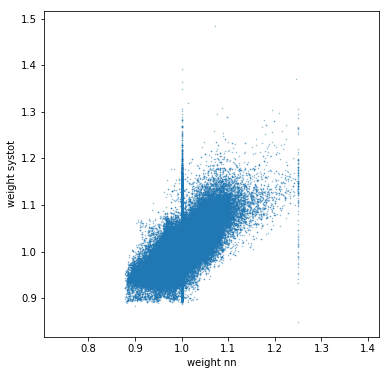

In [83]:
plt.figure(figsize=(6,6))
plt.scatter(mycat.data['WEIGHT_SYSTOT'], mycat.orgcol ,1., marker='.', alpha=0.5)
# plt.plot([0.9, 5.1], [0.9, 5.1], 'k')
# plt.axis([0.8, 1.5, 0, 5.5])
plt.axis('equal')
plt.ylabel('weight systot')
plt.xlabel('weight nn')

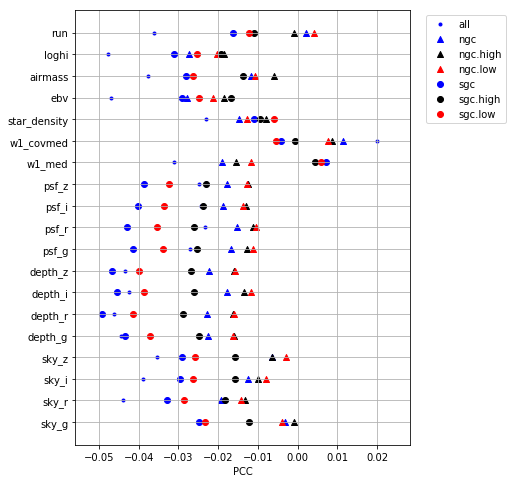

In [12]:
from scipy.stats import pearsonr
files =  glob('/Volumes/TimeMachine/data/eboss/v6/*ngal_features*')
files

pcc_all = {}
for i,file_i in enumerate(files):
    name = file_i.split('/')[-1].split('_')[-1][:-5]
    data = ft.read(file_i, lower=True)
    feat = data['features'].T
    nlbl = data['label']
    nran = data['fracgood']    
    #ngal = data['label']*data['fracgood']
    #mask = np.ones_like(nran)    
    pcc_mine = []
    for j, sys_j in enumerate(feat):
        pcc_mine.append(pearsonr(sys_j, nlbl)[0])
        print('.', end=' ')
    pcc_all[name] = pcc_mine
    print('')    
    
    
plt.figure(figsize=(6,8))
for name_i in pcc_all.keys():
    #if 'low' in name_i or 'high' in name_i:
    if 'sgc' in name_i:
        marker='o'
    elif 'ngc' in name_i:
        marker='^'
    else:
        marker='.'
    if 'low' in name_i:
        color='r'
    elif 'high' in name_i:
        color='k'
    else:
        color='b'
    plt.scatter(pcc_all[name_i], cols_eboss_v6_qso, label=name_i, marker=marker, color=color)
plt.legend(bbox_to_anchor=(1.3, 1.))
plt.grid()
plt.xlabel('PCC')
plt.show()    

In [8]:
nnbar_all = {}
for i,file_i in enumerate(files):
    name = file_i.split('/')[-1].split('_')[-1][:-5]
    data = ft.read(file_i, lower=True)
    feat = data['features'].T
    nlbl = data['label']
    nran = data['fracgood']    
    ngal = data['label']*data['fracgood']
    mask = np.ones_like(nran, '?')    
    nnbar_mine = []
    for j in [5, 15]:
        sys_j = feat[j,:]
        Nbar = nnbar.NNBAR(ngal, nran, mask, sys_j, nbins=8)
        Nbar.run(njack=10)
        nnbar_mine.append([Nbar.output['bin_edges'], Nbar.output['nnbar']])
        print('.', end=' ')
    nnbar_all[name] = nnbar_mine
    print('')    

. . 
. . 
. . 
. . 
. . 
. . 
. . 


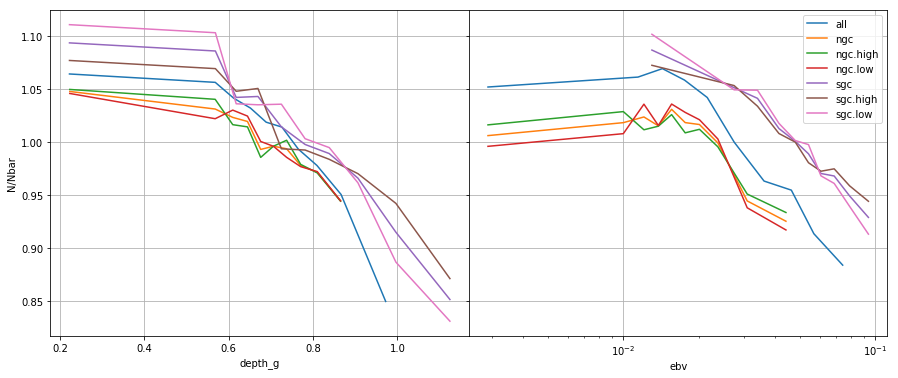

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)
plt.subplots_adjust(wspace=0.0)
for key_i in nnbar_all.keys():
    mychunk = nnbar_all[key_i]
    ax[0].plot(mychunk[0][0][:-1], mychunk[0][1])
    ax[1].plot(mychunk[1][0][:-1], mychunk[1][1], label=key_i)

for axi in ax:axi.grid(True)
ax[0].set_xlabel(cols_eboss_v6_qso[4])
ax[1].set_xlabel(cols_eboss_v6_qso[15])
ax[1].set_xscale('log')
ax[0].set_ylabel('N/Nbar')
ax[1].legend()

In [2]:
wmaps = glob('/Volumes/TimeMachine/data/eboss/v6/results_*/regression/*/nn-weights512.fits')
wmaps, len(wmaps)

(['/Volumes/TimeMachine/data/eboss/v6/results_all/regression/nn_ab/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_all/regression/nn_p/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc/regression/nn_ab/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc/regression/nn_p/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc.high/regression/nn_ab/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc.high/regression/nn_p/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc.low/regression/nn_ab/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc.low/regression/nn_p/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_sgc/regression/nn_ab/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_sgc/regression/nn_p/nn-weights512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_sgc.high/regression/nn_ab/nn-weights512.fits',
  '/Volumes/Ti

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


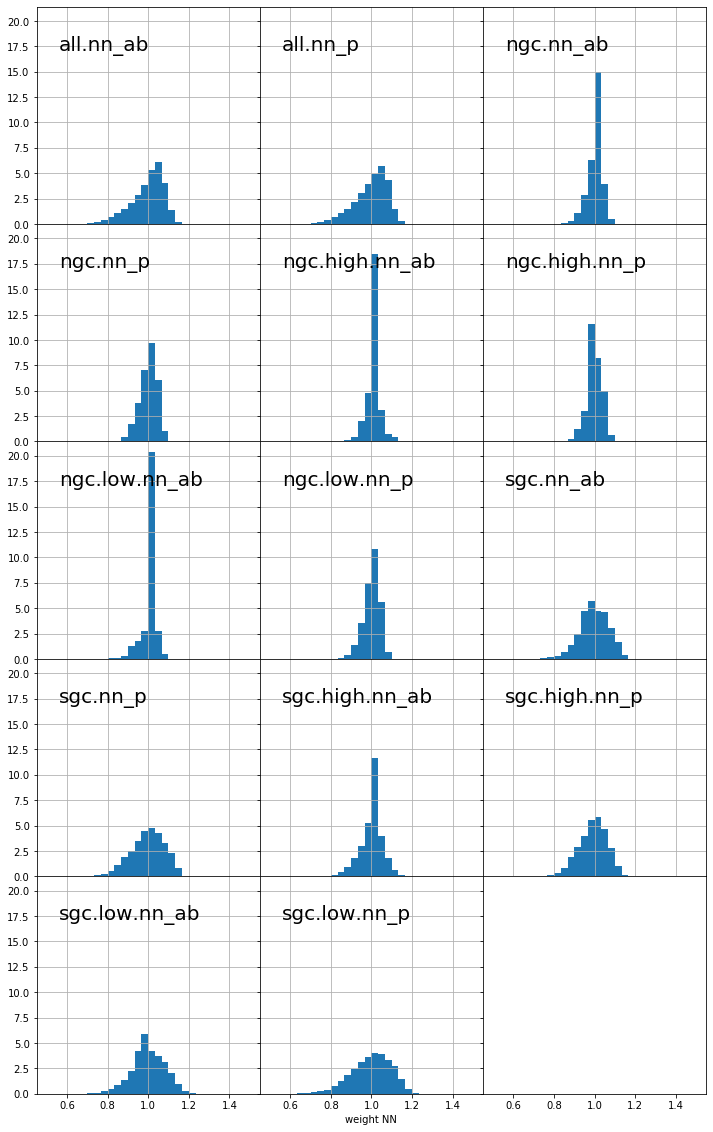

In [10]:
import healpy as hp
import fitsio as ft
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(12, 20), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
ax = ax.flatten()
for i,wm in enumerate(wmaps):
    #hpm = hp.read_map(wm, verbose=False)
    hpf = ft.read(wm)['weight']
    hpm = np.median(hpf, axis=1)
    name = '.'.join((wm.split('/')[6][8:], wm.split('/')[8]))
    ax[i].hist(hpm, range=(0.5, 1.5), bins=30, normed=True)
    ax[i].text(0.1, 0.8, name, transform=ax[i].transAxes, fontsize=20)
    if i==13:ax[i].set_xlabel('weight NN')
    ax[i].grid()
    #ax[i].set_yscale('log')
    #ax[i].set_ylim(0.4, 1.e6)

## Aug 13: modules will be moved to LSSutils 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/rezaie/github/LSSutils')
from LSSutils.catalogs import combinefits, datarelease
import LSSutils.dataviz as dataviz
import fitsio as ft
import pandas as pd
import healpy as hp
import numpy  as np
from glob import glob

In [10]:

len(datarelease.cols_eboss_v6_qso)

19

In [8]:
ls /Volumes/TimeMachine/data/eboss/v6/*sgc*

/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_sgc_v6.dat.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_sgc_v6.ran.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_sgc_wsys_v6.dat.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/fracgood.sgc.high.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/fracgood.sgc.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/fracgood.sgc.low.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/mask.sgc.cut.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/mask.sgc.cut.log
/Volumes/TimeMachine/data/eboss/v6/mask.sgc.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/ngal_features_sgc.fits
/Volumes/TimeMachine/data/eboss/v6/ngal_features_sgc.high.fits
/Volumes/TimeMachine/data/eboss/v6/ngal_features_sgc.low.fits
/Volumes/TimeMachine/data/eboss/v6/qso.sgc.high.hp.512.r.npy
/Volumes/TimeMachine/data/eboss/v6/qso.sgc.hp.512.r.npy
/Volumes/TimeMachine/data/eboss/v6/qso.sgc.low.hp.512.r.npy
/Volumes/TimeMachine/data/eboss/v6/qso_hp

check the fracgood maps

In [5]:
fracs  = glob('/Volumes/TimeMachine/data/eboss/v6/fracgood.*.high.hp.512.fits')
fracs += glob('/Volumes/TimeMachine/data/eboss/v6/fracgood.*.lo*')

236440.00001367182
154523.00001834333
236450.00000647455
154478.99999454618


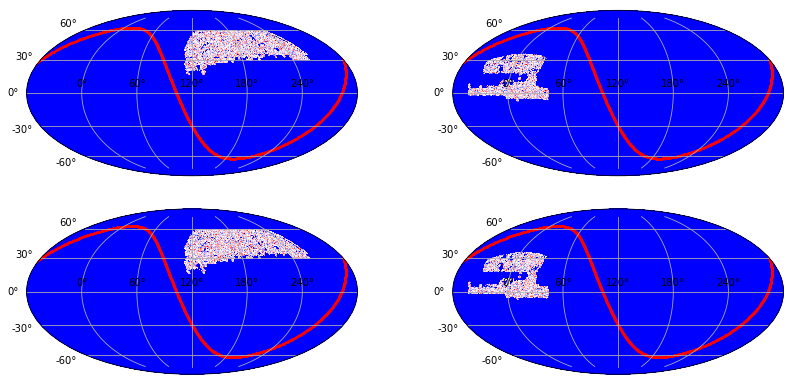

In [6]:
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(421, projection='mollweide')
ax1 = fig.add_subplot(422, projection='mollweide')
ax2 = fig.add_subplot(423, projection='mollweide')
ax3 = fig.add_subplot(424, projection='mollweide')
ax  = [ax0, ax1, ax2, ax3] 
for i,frac in enumerate(fracs):
    dfrac = hp.read_map(frac, verbose=False)
    print(dfrac.sum())
    dataviz.mollview(dfrac, 0, 2., 'fracgood', figax=[fig, ax[i]], cmap=plt.cm.bwr)

There is about 5% difference ..

Rewrite the eBOSS maps as a panda dataframe

In [8]:
maps   = ft.read('/Volumes/TimeMachine/data/eboss/sysmaps/SDSS_WISE_HI_imageprop_nside512.fits', lower=True)
mapspd = pd.DataFrame(maps.byteswap().newbyteorder())
mapspd.to_hdf('/Volumes/TimeMachine/data/eboss/sysmaps/SDSS_WISE_HI_imageprop_nside512.h5', key='eboss')

In [20]:
mapspd.dropna().describe().T

count         mean          std         min          25%  \
nran          824348.0    18.590074     4.400665    1.000000    16.000000   
sky_g         824348.0     1.775070     1.598550    1.017110     1.463897   
sky_r         824348.0     4.364222     1.127181    2.268380     3.607019   
sky_i         824348.0     8.294104     2.202384    3.561309     6.752566   
sky_z         824348.0    25.708848     7.674968    8.231992    20.258839   
airmass       824348.0     1.197396     0.164389    1.000579     1.079718   
ebv           824348.0     0.038564     0.027362    0.002901     0.019938   
depth_g       824348.0     0.506472     0.114545    0.149711     0.426694   
depth_r       824348.0     0.743578     0.167416    0.213760     0.624641   
depth_i       824348.0     4.592053     1.017571    1.331858     3.864865   
depth_z       824348.0     1.142766     0.255411    0.417808     0.960585   
psf_g         824348.0     1.449542     0.215554    0.513762     1.293096   
psf_r         824348.0     1.328714     0.212349    0.431384     1.177952   
psf_i         824348.0     1.260158     0.212607    0.522643     1.109244   
psf_z         824348.0     1.288073     0.197291    0.438715     1.147006   
w1_med        824348.0     3.322414     0.834678    1.913656     2.622987   
w1_covmed     824348.0    31.870481    11.606653   15.545898    24.042431   
w1_moon       824348.0     0.005912     0.105455    0.000000     0.000000   
star_density  824348.0    30.241250    18.787356    0.000000    17.750000   
loghi         824348.0    20.410930     0.241551   19.679572    20.218270   
run           824348.0  4612.039110  2040.436688  109.000000  3130.000000   

                      50%          75%          max  
nran            18.000000    21.000000    46.000000  
sky_g            1.679512     1.981652   520.229311  
sky_r            4.080930     4.893193    31.700936  
sky_i            7.870502     9.370399    32.408181  
sky_z           24.415000    29.630740    81.877249  
airmass          1.157352     1.256353     2.021853  
ebv              0.031355     0.049305     0.488516  
depth_g          0.489584     0.560713     2.919821  
depth_r          0.716348     0.826595     2.580875  
depth_i          4.423298     5.138446    12.767415  
depth_z          1.102046     1.275812     3.124946  
psf_g            1.425851     1.575337     3.359714  
psf_r            1.307114     1.457599     3.633423  
psf_i            1.238893     1.388963     3.299957  
psf_z            1.268912     1.410220     3.224887  
w1_med           3.350840     4.006639    19.807560  
w1_covmed       28.286222    35.353260   149.094722  
w1_moon          0.000000     0.000000     5.000000  
star_density    23.250000    36.000000   182.750000  
loghi           20.439045    20.608273    21.276705  
run           4384.703613  5655.000000  8162.000000

Write low and high redshift QSOs 

In [11]:
dataframe = pd.read_hdf('/Volumes/TimeMachine/data/eboss/sysmaps/SDSS_WISE_HI_imageprop_nside512.h5')

In [6]:
my_cols = datarelease.cols_eboss_v6_qso
hpmask  = None
hpfrac  = None
zcuts   = {'low':[0.8, 1.508088732762684], 'high':[1.508088732762684, 2.2]}

#
for cap in ['ngc', 'sgc']:
    catalogs = []
    for key_i in zcuts.keys():
        CAP      = cap.upper()
        mytag    = cap+'.'+key_i
        fitname  = '/Volumes/TimeMachine/data/eboss/v6/ngal_features_ngc.fits'.replace('ngc',   mytag)
        fitkfld  = '/Volumes/TimeMachine/data/eboss/v6/qso.ngc.hp.512.r.npy'.replace('ngc',     mytag)
        #hpfrac   = '/Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.hp.512.fits'.replace('ngc', mytag) # will not write new fracmap
        catname  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits'.replace('NGC', CAP)
        
        hpfracall= '/Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.hp.512.fits'.replace('ngc', cap) # use the same thing

        mycat    = combinefits.EBOSSCAT([catname])    
        mycat.apply_zcut(zcuts[key_i])
        mycat.project2hp()
        dataframe['ngal'] = mycat.galm.astype('f8')

        myran    = hp.read_map(hpfracall, verbose=False).astype('f8')
        myran[myran<=0.0] = np.nan # make nan
        dataframe['nran']  = myran

        myfit    = dataframe.dropna()
        print('shape myfit {} {} {}'.format(cap, key_i, myfit.shape))
        #print(fitname, fitkfld, hpfrac, catname, hpfracall, end=3*'\n')
        combinefits.hd5_2_fits(myfit, my_cols, fitname, None, hpfrac, fitkfld, res=512, k=5)
        print(10*'=', end=3*'\n')

NameError: name 'datarelease' is not defined

make new fracgood maps

In [4]:
my_cols = datarelease.cols_eboss_v6_qso
hpmask  = None
hpfrac  = None
zcuts   = {'low':[0.8, 1.508088732762684], 'high':[1.508088732762684, 2.2]}

#
for cap in ['ngc', 'sgc']:
    catalogs = []
    for key_i in zcuts.keys():
        CAP      = cap.upper()
        mytag    = cap+'.'+key_i        
        hpfrac   = '/Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.hp.512.fits'.replace('ngc', mytag)
        catname  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits'.replace('NGC', CAP)
        ranname  = '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits'.replace('NGC', CAP)
        

        mycat    = combinefits.EBOSSCAT([catname])    
        mycat.apply_zcut(zcuts[key_i])
        mycat.project2hp()
        dataframe['ngal'] = mycat.galm.astype('f8')

        
        mycat    = combinefits.EBOSSCAT([ranname])    
        mycat.apply_zcut(zcuts[key_i])
        mycat.project2hp()
        myran = mycat.galm.astype('f8')
        myran[myran<=0.0] = np.nan # make nan
        dataframe['nran'] = myran
        
        
        myfit    = dataframe.dropna()
        print('shape myfit {} {} {}'.format(cap, key_i, myfit.shape))
        #print(fitname, fitkfld, hpfrac, catname, hpfracall, end=3*'\n')
        combinefits.hd5_2_fits(myfit, my_cols, None, None, hpfrac, None, res=512, k=5)
        print(10*'=', end=3*'\n')

len of gal cats 1
num of gal obj 216893
going to apply z-cuts : [0.8, 1.508088732762684]
num of gal obj after cut 108446
projecting into a healpix map with nside of 512
len of gal cats 1
num of gal obj 5565871
going to apply z-cuts : [0.8, 1.508088732762684]
num of gal obj after cut 2783456
projecting into a healpix map with nside of 512
shape myfit ngc low (236450, 22)
wrote /Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.low.hp.512.fits


len of gal cats 1
num of gal obj 216893
going to apply z-cuts : [1.508088732762684, 2.2]
num of gal obj after cut 108446
projecting into a healpix map with nside of 512
len of gal cats 1
num of gal obj 5565871
going to apply z-cuts : [1.508088732762684, 2.2]
num of gal obj after cut 2782394
projecting into a healpix map with nside of 512
shape myfit ngc high (236440, 22)
wrote /Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.high.hp.512.fits


len of gal cats 1
num of gal obj 125501
going to apply z-cuts : [0.8, 1.508088732762684]
num of gal obj afte

## Prior to Aug 13: using local and SYSNet modules

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import fitsio as ft
import healpy as hp
import numpy as np
from   glob import glob
import pandas as pd
import seaborn as sns

# PATHS to my storage
# mehdi  @ cori
# rezaie @ OU iMac
HOME    = os.getenv('HOME')
USER    = os.getenv('USER')
sys.path.append(HOME + '/github/SYSNet/src')
from prepare import CAT, combinemaps, hd5_2_fits
from dataviz import hyper_params_data
import utils as ut
import nnbar
#from utils import split2Kfolds, split2KfoldsSpatially
dirs    = dict(rezaie='/Volumes/TimeMachine/data/', mehdi='/global/cscratch1/sd/mehdi/')
scratch = dirs[USER]
print('home is {}'.format(HOME))

camb is not installed!
home is /Users/rezaie
home is /Users/rezaie


In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)
params = {
'axes.spines.right':True,
'axes.spines.top':True,
'axes.labelsize': 15,
#'text.fontsize': 8,
'legend.fontsize': 8,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'text.usetex': False,
'figure.figsize': [4, 3],
'font.family':'serif',
'font.size':12
}    
plt.rcParams.update(params)

## aug 2: with new imaging maps

check for extreme weights

In [7]:
maps = glob('/Volumes/TimeMachine/data/eboss/v6/results_*/regression/nn_*/nn-weights.hp512.fits')
maps

['/Volumes/TimeMachine/data/eboss/v6/results_all/regression/nn_ab/nn-weights.hp512.fits',
 '/Volumes/TimeMachine/data/eboss/v6/results_all/regression/nn_p/nn-weights.hp512.fits',
 '/Volumes/TimeMachine/data/eboss/v6/results_ngc/regression/nn_ab/nn-weights.hp512.fits',
 '/Volumes/TimeMachine/data/eboss/v6/results_ngc/regression/nn_p/nn-weights.hp512.fits',
 '/Volumes/TimeMachine/data/eboss/v6/results_sgc/regression/nn_ab/nn-weights.hp512.fits',
 '/Volumes/TimeMachine/data/eboss/v6/results_sgc/regression/nn_p/nn-weights.hp512.fits']

In [10]:
for m in maps:
    md = hp.read_map(m, verbose=False)
    print(md[md!=0.0].max())

1.2549029904089268
2.790826806603092
1.13463830562509
1.180743273148738
1.2104481997630612
1.2407585451169287


In [5]:
cls =  glob('/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_uni.npy')\
       + glob('/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_nn_*.npy')\
       + glob('/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_uni_wsys.npy')
print(cls)

['/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_uni.npy', '/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_nn_ab.npy', '/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_nn_p.npy', '/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_uni_wsys.npy']


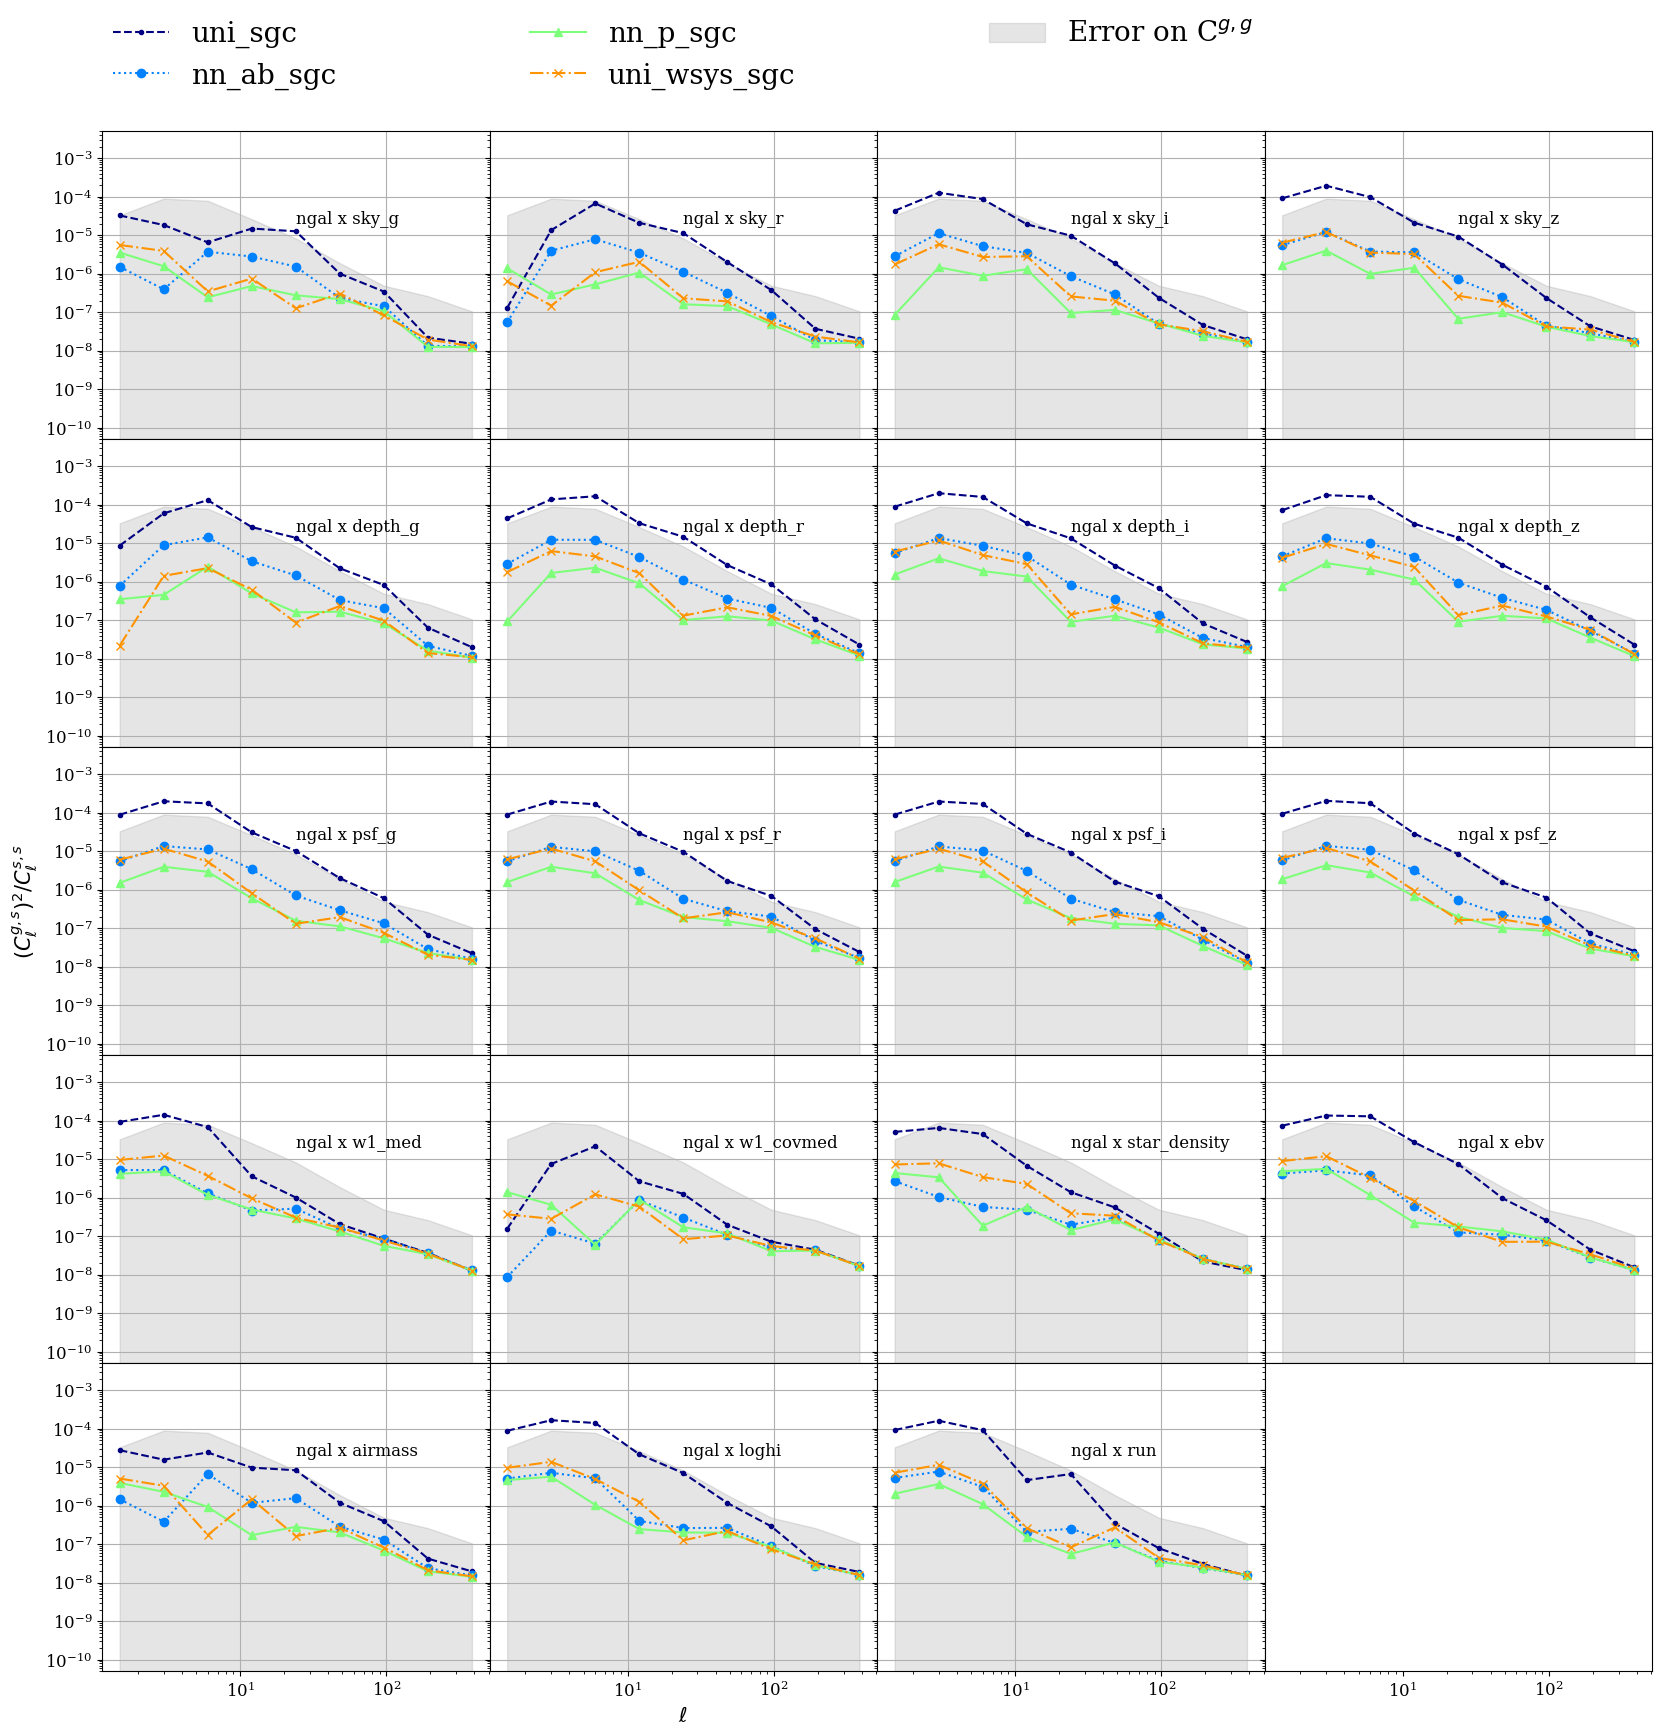

In [6]:
fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(20, 20), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0., wspace=0)
ax = ax.flatten()

clsys = np.load('/Volumes/TimeMachine/data/eboss/v6/results_sgc/clustering/cl_sys.npy').item()
#lt = ['lin', 'NN+Ablation', 'NN', 'quad', 'No Correction']
#cl = ['r', 'b', 'k', 'g', 'purple']
ls = ['--', ':', '-', '-.', '-']
mk = ['.', 'o', '^', 'x']
n  = len(cls)
clr  = plt.cm.jet
for j,cell_i in enumerate(cls):
    d = np.load(cell_i).item()
    lt = '_'.join((cell_i.split('/')[-1].split('.')[0][3:], cell_i.split('/')[6].split('_')[-1]))
    for i in range(d['cross'].shape[0]):
        l = np.arange(d['cross'][i, :].size)
        cl= d['cross'][i, :]**2 / clsys['cross'][i, :]
        lb, clb = ut.binit(l, cl)
        #print(lb, clb)
        #a[i].plot(l, cl, color=color, label=label, linestyle=ls)
        ax[i].plot(lb, clb, color=clr(j/n), label=lt, marker=mk[j], linestyle=ls[j])
        if j ==n-1:
            ax[0].legend(**dict(ncol=3,frameon=False,
                 bbox_to_anchor=(0, 1.1, 3, 0.4), loc="lower left",
                mode="expand", borderaxespad=0, fontsize=20))
            ax[i].set_xscale('log')
            #ax[0].set_xlim(1, 3)
            ax[i].set_ylim(5.e-11, 5.e-3)
            ax[i].set_yscale('log')
            ax[i].text(0.5, 0.7, 'ngal x %s'%d['clabels'][i], transform=ax[i].transAxes)
            ax[i].grid()
            if i==8:ax[i].set_ylabel(r'$(C^{g,s}_{\ell})^{2}/C^{s,s}_{\ell}$')
            if i==17:ax[i].set_xlabel(r'$\ell$')
    if j==0:
        lb, clbe = ut.binit_jac(d['clerr']['cljks'])
        for i in range(d['cross'].shape[0]):
            ax[i].fill_between(lb, 1.e-13, clbe, color='grey', label=r'Error on C$^{g,g}$', alpha=0.2)
plt.show()                

In [2]:
nnbars = glob('/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_uni.npy')\
       + glob('/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_nn_*.npy')\
       + glob('/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_uni_wsys.npy')
print(nnbars)

['/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_uni.npy', '/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_nn_ab.npy', '/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_nn_p.npy', '/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_uni_wsys.npy']


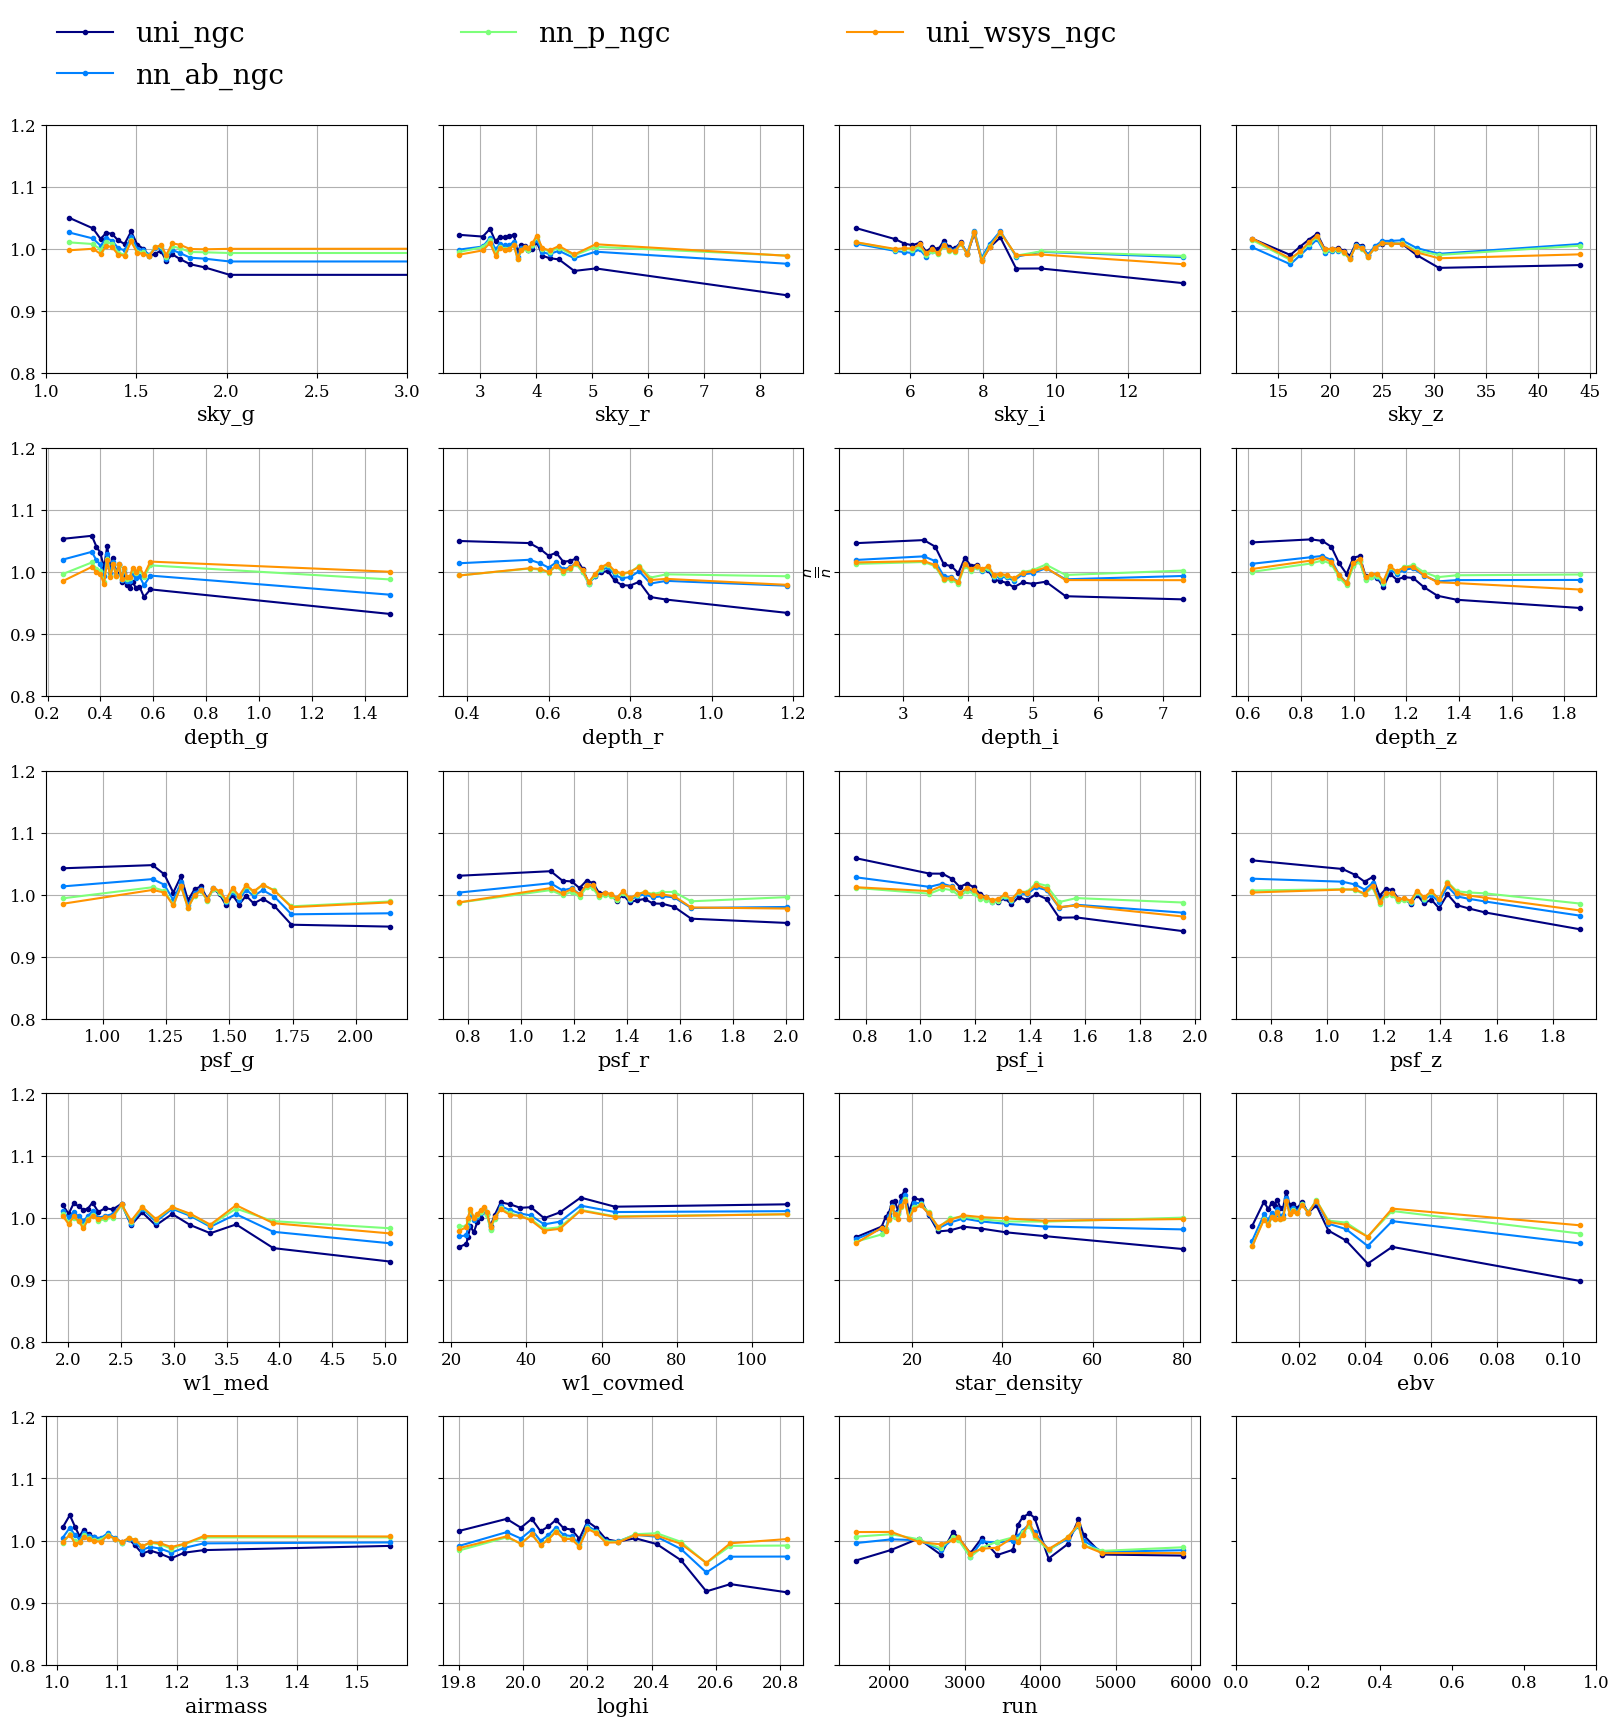

In [4]:
mpl.rcParams.update(mpl.rcParamsDefault)
params = {
'axes.spines.right':True,
'axes.spines.top':True,
'axes.labelsize': 15,
#'text.fontsize': 8,
'legend.fontsize': 8,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'text.usetex': False,
'figure.figsize': [4, 3],
'font.family':'serif',
'font.size':12
}    
plt.rcParams.update(params) 

fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(20, 20), sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0.1)
ax = ax.flatten()

#lt = ['lin', 'NN+Ablation', 'NN', 'quad', 'No Correction']
#cl = ['r', 'b', 'k', 'g', 'purple']
ls = ['--', ':', '-', '-.', '-']
n  = len(nnbars)
cl  = plt.cm.jet
for j,nnbar_i in enumerate(nnbars):
    nnbar = np.load(nnbar_i).item()
    lt = '_'.join((nnbar_i.split('/')[-1].split('.')[0][6:], nnbar_i.split('/')[6].split('_')[-1]))
    for i in range(len(nnbar['nnbar'])):
        mynnb = nnbar['nnbar'][i]
        x = 0.5*(mynnb['bin_edges'][1:]+mynnb['bin_edges'][:-1])
        y = mynnb['nnbar']
        ye = mynnb['nnbar_err']
        ax[i].plot(x, y, marker='.', color=cl(j/n), label=lt)
        if j ==n-1:
            ax[0].legend(**dict(ncol=3,frameon=False,
                 bbox_to_anchor=(0, 1.1, 3, 0.4), loc="lower left",
                mode="expand", borderaxespad=0, fontsize=20))
            ax[0].set_xlim(1, 3)
            ax[i].set_ylim(0.8, 1.2)
            ax[i].set_xlabel(nnbar['xlabels'][i])
            ax[i].grid()
            if i==6:ax[i].set_ylabel(r'$\frac{n}{\overline{n}}$')
plt.show()                

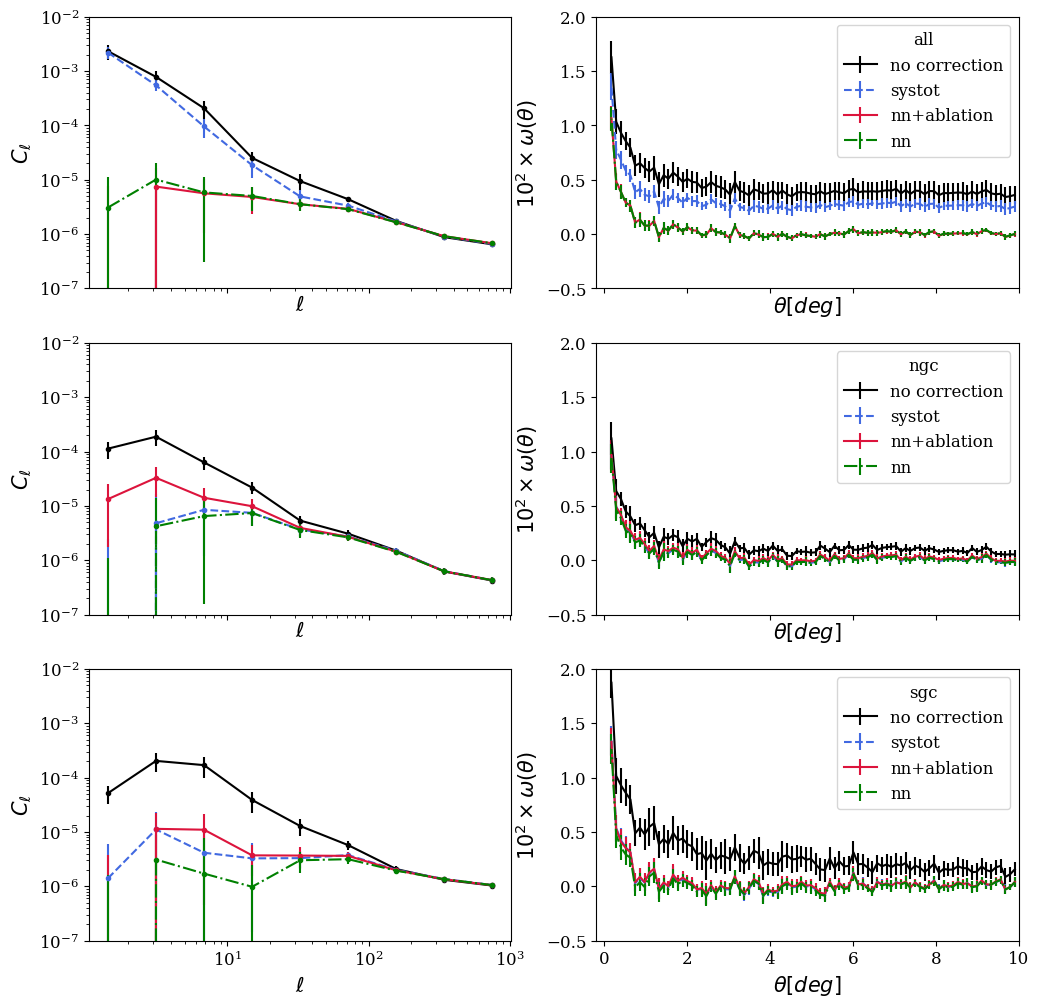

In [10]:
def plot_clxi(filen, filen2, ax, ttl):    
    mpl.rcParams.update(mpl.rcParamsDefault)
    params = {
    'axes.spines.right':True,
    'axes.spines.top':True,
    'axes.labelsize': 15,
    #'text.fontsize': 8,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [4, 3],
    'font.family':'serif',
    'font.size':12
    }    
    plt.rcParams.update(params) 

    lb = ['uni', 'uni_wsys', 'nn_ab', 'nn_p']
    lt = ['no correction', 'systot', 'nn+ablation', 'nn']
    c  = ['k', 'royalblue', 'crimson', 'g', '', 'purple']
    ls = ['-', '--', '-', '-.', '', '-']

#     fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
#     plt.subplots_adjust(wspace=0.4)

    kw = dict(bins=np.logspace(np.log10(0.9), np.log10(1030), 10))
    for i,lbi in enumerate(lb):
        cl = np.load(filen(lbi)).item()
        elb, clbe = ut.binit_jac(cl['clerr']['cljks'], **kw)
        elb, clb  = ut.binit(np.arange(cl['auto'].size), cl['auto']-4.295060549836234e-6, **kw)
        #print(clb)
        ax[0].errorbar(elb, clb, yerr=clbe, marker='.', linestyle=ls[i], color=c[i], label=lt[i])

    ax[0].loglog()
    ax[0].set_ylim(1.e-7, 1.e-2)
    ax[0].set_xlabel(r'$\ell$')
    ax[0].set_ylabel(r'$C_{\ell}$')

    fc = 1.e2
    for i, xii in enumerate(lb):
        d = np.load(filen2(xii)).item()['auto']
        t  = 0.5*np.degrees(d['t'][1:]+d['t'][:-1])
        xi = fc*(d['w']-d['dmean']*d['dmean'])

        xierr=d['werr']
        ax[1].errorbar(t, xi, yerr=fc*xierr, linestyle=ls[i], color=c[i], label=lt[i])
        #ax[0].legend(bbox_to_anchor=(0, 1.1, 2, 0.4), loc="lower left",
        #            mode="expand", borderaxespad=0, ncol=3, frameon=False)    
        ax[1].set_xlabel(r'$\theta [deg]$')
        ax[1].set_ylabel(r'$10^{2}\times \omega(\theta)$')
        ax[1].set_xlim(-0.2, 10)
        ax[1].set_ylim(-0.5, 2.0)
        ax[1].grid()
        ax[1].legend(title=ttl)        
    #plt.show()
    

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), sharex='col')
ax = ax.flatten()
# plt.subplots_adjust(hspace=0.0)

for i,cap in enumerate(['all', 'ngc', 'sgc']):
    filen = lambda l:'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/cl_'+l+'.npy'
    filen2 = lambda l:'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/xi_'+l+'.npy'
    plot_clxi(filen, filen2, [ax[2*i], ax[2*i+1]], cap)
plt.show()    

## Aug 1: make new table file

In [29]:
# check if there is any NaN
d = ft.read('/Volumes/TimeMachine/data/eboss/v6/ngal_features_all.fits', lower=True)
for n in d.dtype.names:
    print('nans', np.isnan(d[n]).sum(), end=' ')
    print('stds', np.std(d[n], axis=0))

nans 0 stds 1.3312071177033697
nans 0 stds 417753.6023250429
nans 0 stds [1.40526413e+00 1.24345386e+00 2.31460641e+00 7.94370185e+00
 1.19607491e-01 1.75159806e-01 1.04947017e+00 2.62109772e-01
 2.20412611e-01 2.15221350e-01 2.13114467e-01 1.97432038e-01
 8.66234798e-01 1.35547310e+01 1.91764408e+01 2.67488185e-02
 1.71216873e-01 2.75545342e-01 2.09055012e+03]
nans 0 stds 0.27293532923452124


In [30]:
d['features'].shape

(392502, 19)

In [25]:
# combine them
COLS = ['sky_g', 'sky_r', 'sky_i', 'sky_z', 
        'depth_g', 'depth_r', 'depth_i','depth_z',
        'psf_g','psf_r', 'psf_i', 'psf_z',
        'w1_med', 'w1_covmed',
        'star_density', 'ebv', 'airmass', 'loghi', 'run']

for cap in ['all', 'sgc', 'ngc']:    
    print('working on %s'%cap)
    pdm = combinemaps(scratch+'eboss/v6/eBOSS_QSO_clustering_'+cap+'_v6.dat.hp.512.fits',
                      scratch+'eboss/v6/eBOSS_QSO_clustering_'+cap+'_v6.ran.hp.512.fits',
                      scratch +'/eboss/sysmaps/SDSS_WISE_HI_imageprop_nside512.fits')
    pdm.maketable(cols=COLS)
    pdm.to_hdf(scratch+'eboss/v6/qso_hpsyst_'+cap+'.hf', 'qso_hpsyst', mode='w', format='fixed')
    # read hdf, write label, features to fits
    fitname  = '/Volumes/TimeMachine/data/eboss/v6/ngal_features_'+cap+'.fits'
    metaname = '/Volumes/TimeMachine/data/eboss/v6/qso_hpsyst_'+cap+'.hf'
    hpmask   = '/Volumes/TimeMachine/data/eboss/v6/mask.'+cap+'.hp.512.fits'
    hpfrac   = '/Volumes/TimeMachine/data/eboss/v6/fracgood.'+cap+'.hp.512.fits'
    hd5_2_fits(metaname, fitname, hpmask, hpfrac, COLS)
    # randomly split the label features into 5 partitions
    ut.read_split_write('/Volumes/TimeMachine/data/eboss/v6/ngal_features_'+cap+'.fits', 
                   '/Volumes/TimeMachine/data/eboss/v6/qso.'+cap+'.hp.512.r',
                   5)

working on all
attributes : ('nran', 'sky_g', 'sky_r', 'sky_i', 'sky_z', 'airmass', 'ebv', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'w1_med', 'w1_covmed', 'w1_moon', 'star_density', 'loghi', 'run')
total mask ran > 0 : 392584
total mask after nan maps : 392502
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145728 entries, 0 to 3145727
Data columns (total 22 columns):
ngal            float64
nran            float64
mask            bool
sky_g           float64
sky_r           float64
sky_i           float64
sky_z           float64
depth_g         float64
depth_r         float64
depth_i         float64
depth_z         float64
psf_g           float64
psf_r           float64
psf_i           float64
psf_z           float64
w1_med          float64
w1_covmed       float64
star_density    float64
ebv             float64
airmass         float64
loghi           float64
run             float64
dtypes: bool(1), float64(21)
memory usage: 507.0 MB
Info :  No

* Add mean Run and logHI

In [14]:
maps = ft.read('/Volumes/TimeMachine/data/eboss/sysmaps/SDSS_WISE_imageprop_nside512.fits', lower=True)
maps.dtype.names

('nran',
 'sky_g',
 'sky_r',
 'sky_i',
 'sky_z',
 'airmass',
 'ebv',
 'depth_g',
 'depth_r',
 'depth_i',
 'depth_z',
 'psf_g',
 'psf_r',
 'psf_i',
 'psf_z',
 'w1_med',
 'w1_covmed',
 'w1_moon',
 'star_density')

In [15]:
logHI   = np.log10(ut.fixHI(nside_out=512))
meanrun = hp.read_map('/Volumes/TimeMachine/data/eboss/sysmaps/sdss_run_mean_512.fits', verbose=False)

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [21]:
newmaps = ut.rfn.append_fields(maps, ['logHI', 'run'], data=[logHI, meanrun], dtypes=['>f8', '>f8'], usemask=False)

In [23]:
newmaps.dtype

dtype([('nran', '>f8'), ('sky_g', '>f8'), ('sky_r', '>f8'), ('sky_i', '>f8'), ('sky_z', '>f8'), ('airmass', '>f8'), ('ebv', '>f8'), ('depth_g', '>f8'), ('depth_r', '>f8'), ('depth_i', '>f8'), ('depth_z', '>f8'), ('psf_g', '>f8'), ('psf_r', '>f8'), ('psf_i', '>f8'), ('psf_z', '>f8'), ('w1_med', '>f8'), ('w1_covmed', '>f8'), ('w1_moon', '>f8'), ('star_density', '>f8'), ('logHI', '>f8'), ('run', '>f8')])

In [22]:
ft.write('/Volumes/TimeMachine/data/eboss/sysmaps/SDSS_WISE_HI_imageprop_nside512.fits', newmaps)

### check if there is any trend agains mean run

In [2]:
sdssran = ft.read('/Volumes/TimeMachine/data/eboss/sysmaps/eBOSSrandoms.ran.fits', lower=True)
sdssran.dtype

dtype([('ra', '>f8'), ('dec', '>f8'), ('ipoly', '>i2'), ('isect', '>i2'), ('skyflux', '>f4', (5,)), ('airmass', '>f4'), ('eb_minus_v', '>f4'), ('image_depth', '>f4', (5,)), ('psf_fwhm', '>f4', (5,)), ('run', '>i4'), ('rerun', 'S3'), ('camcol', '>i4'), ('field', '>i4')])

In [9]:
nside = 512
hprun = ut.projectradec2hp(nside, sdssran['ra'], sdssran['dec'], sdssran['run'], statistic='mean')

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


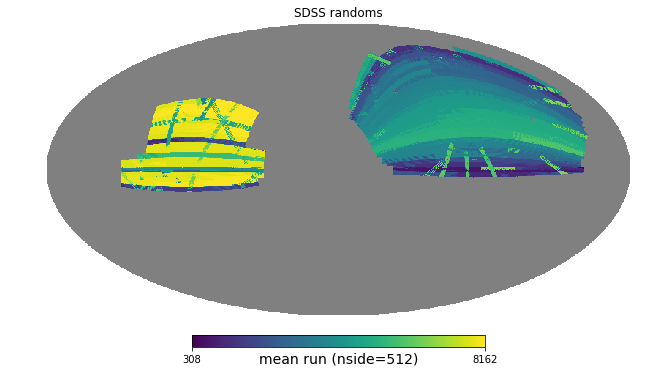

In [10]:
hp.mollview(hprun, unit='mean run (nside=512)', rot=-89, title='SDSS randoms')

In [11]:
hp.write_map('/Volumes/TimeMachine/data/eboss/sysmaps/sdss_run_mean_512.fits', hprun, fits_IDL=False)

In [2]:
hprun = hp.read_map('/Volumes/TimeMachine/data/eboss/sysmaps/sdss_run_mean_512.fits')

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [3]:
ghp = lambda cap: '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+cap+'_v6.dat.hp.512.fits'
rhp = lambda cap: '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+cap+'_v6.ran.hp.512.fits'
msk = lambda cap: '/Volumes/TimeMachine/data/eboss/v6/mask.'+cap+'.hp.512.fits'

min sys : 1302.00  max sys : 6752.00
num of pts : 237220, num of bins : 20
min sys : 109.00  max sys : 8162.00
num of pts : 155282, num of bins : 20
min sys : 1302.00  max sys : 6752.00
num of pts : 237220, num of bins : 20
min sys : 109.00  max sys : 8162.00
num of pts : 155282, num of bins : 20


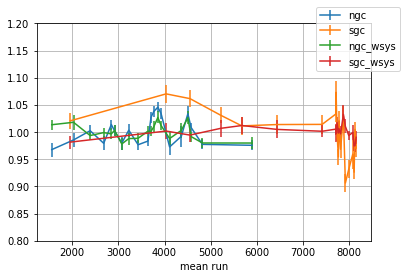

In [13]:
fig, ax = plt.subplots()
kw = dict(verbose=False)
CAPS = ['ngc', 'sgc', 'ngc_wsys', 'sgc_wsys']

for lb in CAPS:
    galmap = hp.read_map(ghp(lb), **kw)
    if 'wsys' in lb:
        lb2 = lb[:3]
    else:
        lb2 = lb
    ranmap = hp.read_map(rhp(lb2), **kw)
    mask   = hp.read_map(msk(lb2), **kw).astype('bool')
    nnb = nnbar.NNBAR(galmap, ranmap, mask, hprun, binning='equi-area')
    nnb.run()
    res = nnb.output
    x   = 0.5 * (res['bin_edges'][1:]+res['bin_edges'][:-1])
    y   = res['nnbar']
    ye  = res['nnbar_err']
    ax.errorbar(x, y, yerr=ye, label=lb)
ax.set_ylim(0.8, 1.2)
ax.set_xlabel('mean run')
ax.legend(bbox_to_anchor=(1.1, 1.1))
ax.grid()

## Jul 31: check if there is a residual against the lnHI

In [2]:
HI = ut.fixHI(nside_out=512)
logHI = np.log10(HI)

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


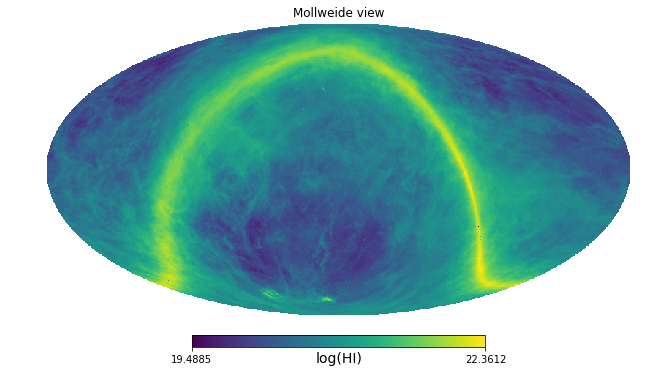

In [3]:
hp.mollview(logHI, unit='log(HI)')

In [5]:
ghp = lambda cap: '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+cap+'_v6.dat.hp.512.fits'
rhp = lambda cap: '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_'+cap+'_v6.ran.hp.512.fits'
msk = lambda cap: '/Volumes/TimeMachine/data/eboss/v6/mask.'+cap+'.hp.512.fits'

In [16]:
ls /Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_*hp*

/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_all_v6.dat.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_all_v6.ran.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_all_wsys_v6.dat.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_ngc_v6.dat.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_ngc_v6.ran.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_ngc_wsys_v6.dat.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_sgc_v6.dat.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_sgc_v6.ran.hp.512.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_sgc_wsys_v6.dat.hp.512.fits


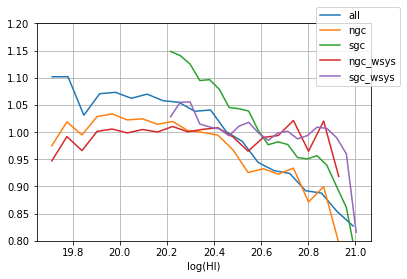

In [18]:
fig, ax = plt.subplots()
kw = dict(verbose=False)
CAPS = ['all', 'ngc', 'sgc', 'ngc_wsys', 'sgc_wsys']

for lb in CAPS:
    galmap = hp.read_map(ghp(lb), **kw)
    if 'wsys' in lb:
        lb2 = lb[:3]
    else:
        lb2 = lb
    ranmap = hp.read_map(rhp(lb2), **kw)
    mask   = hp.read_map(msk(lb2), **kw).astype('bool')
    nnb = nnbar.NNBAR(galmap, ranmap, mask, logHI, binning='simple')
    nnb.run()
    res = nnb.output
    x   = 0.5 * (res['bin_edges'][1:]+res['bin_edges'][:-1])
    y   = res['nnbar']
    ax.plot(x, y, label=lb)
ax.set_ylim(0.8, 1.2)
ax.set_xlabel('log(HI)')
ax.legend(bbox_to_anchor=(1.1, 1.1))
ax.grid()

## project catalogs to healpix maps, prepare for regression and clustering

Jul 24:  w1_moon is zero for all NGC pixels, we removed it!

### SGC+NGC

len of gal cats 2
num of gal obj 342394
projecting into a healpix map with nside of 512


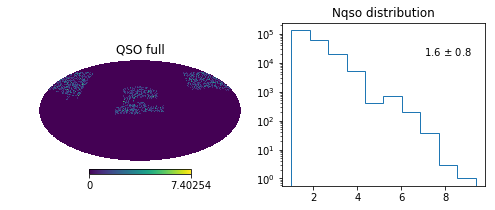

len of gal cats 2
num of gal obj 342394
projecting into a healpix map with nside of 512


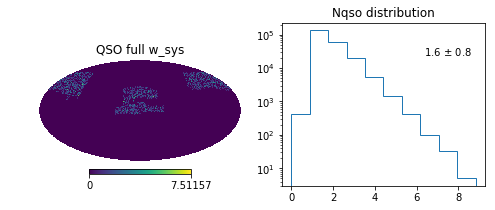

len of gal cats 2
num of gal obj 9153197
projecting into a healpix map with nside of 512


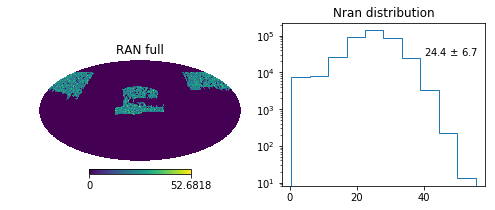

attributes : ('nran', 'sky_g', 'sky_r', 'sky_i', 'sky_z', 'airmass', 'ebv', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'w1_med', 'w1_covmed', 'w1_moon', 'star_density')
total mask ran > 0 : 392584
total mask after nan maps : 392502
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145728 entries, 0 to 3145727
Data columns (total 20 columns):
ngal            float64
nran            float64
mask            bool
sky_g           float64
sky_r           float64
sky_i           float64
sky_z           float64
depth_g         float64
depth_r         float64
depth_i         float64
depth_z         float64
psf_g           float64
psf_r           float64
psf_i           float64
psf_z           float64
w1_med          float64
w1_covmed       float64
star_density    float64
ebv             float64
airmass         float64
dtypes: bool(1), float64(19)
memory usage: 459.0 MB
Info :  None



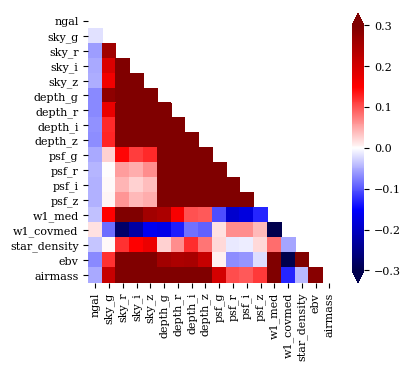

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


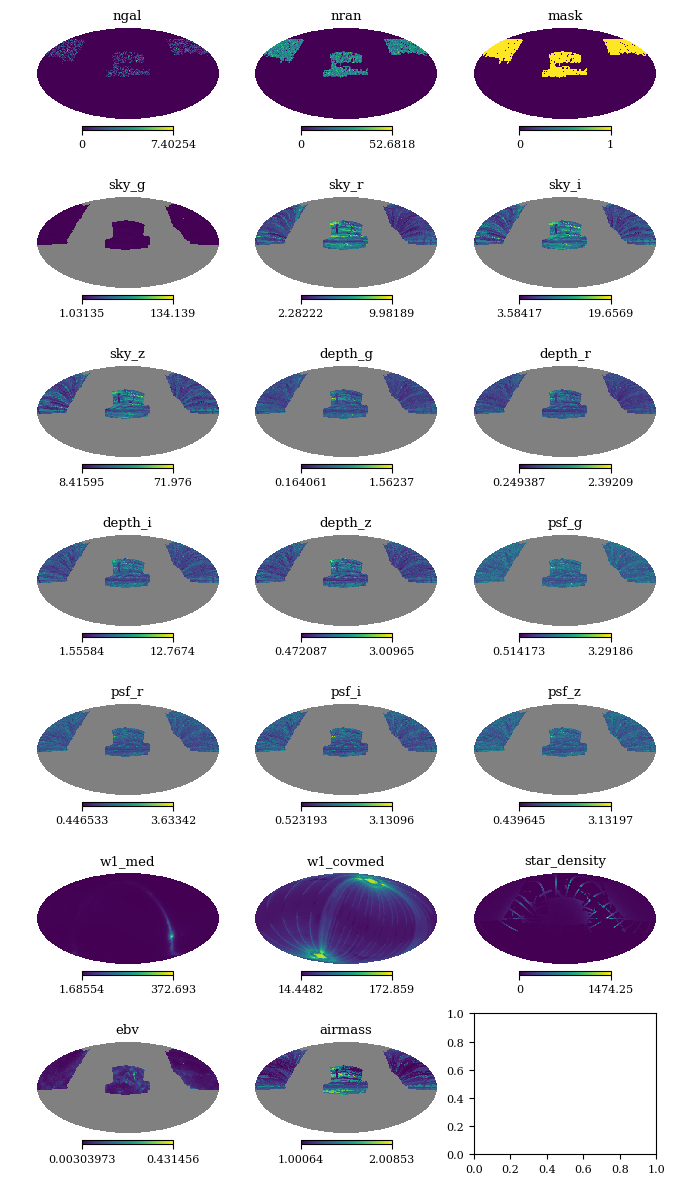

wrote /Volumes/TimeMachine/data/eboss/v6/ngal_features_all.fits
wrote /Volumes/TimeMachine/data/eboss/v6/mask.all.hp.512.fits
wrote /Volumes/TimeMachine/data/eboss/v6/fracgood.all.hp.512.fits


In [2]:
# data
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits', 
              scratch+'eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_all_v6.dat.hp.512.fits')
qsocat.plot_hist(['QSO full', 'Nqso distribution'])

# data with systot
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits', 
              scratch+'eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits'], 
            weights=['weight_systot', 'weight_cp', 'weight_noz'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_all_wsys_v6.dat.hp.512.fits')
qsocat.plot_hist(['QSO full w_sys', 'Nqso distribution'])

# random
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits', 
              scratch+'eboss/v6/eBOSS_QSO_clustering_SGC_v6.ran.fits'],
             weights=['weight_systot', 'weight_cp', 'weight_noz'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_all_v6.ran.hp.512.fits')
qsocat.plot_hist(['RAN full', 'Nran distribution'])


# combine them
COLS = ['sky_g', 'sky_r', 'sky_i', 'sky_z', 
        'depth_g', 'depth_r', 'depth_i','depth_z',
        'psf_g','psf_r', 'psf_i', 'psf_z',
        'w1_med', 'w1_covmed',
        'star_density', 'ebv', 'airmass']
pdm = combinemaps(scratch+'eboss/v6/eBOSS_QSO_clustering_all_v6.dat.hp.512.fits',
                  scratch+'eboss/v6/eBOSS_QSO_clustering_all_v6.ran.hp.512.fits',
                  scratch +'/eboss/sysmaps/SDSS_WISE_imageprop_nside512.fits')
pdm.maketable(cols=COLS)
pdm.to_hdf(scratch+'eboss/v6/qso_hpsyst_all.hf', 'qso_hpsyst', mode='w', format='fixed')
pdm.plot_corrmax([-.3, .3])
pdm.plot_mollweide()

# read hdf, write label, features to fits
fitname = '/Volumes/TimeMachine/data/eboss/v6/ngal_features_all.fits'
metaname = '/Volumes/TimeMachine/data/eboss/v6/qso_hpsyst_all.hf'
hpmask   = '/Volumes/TimeMachine/data/eboss/v6/mask.all.hp.512.fits'
hpfrac   = '/Volumes/TimeMachine/data/eboss/v6/fracgood.all.hp.512.fits'
hd5_2_fits(metaname, fitname, hpmask, hpfrac, COLS)

# randomly split the label features into 5 partitions
ut.read_split_write('/Volumes/TimeMachine/data/eboss/v6/ngal_features_all.fits', 
                   '/Volumes/TimeMachine/data/eboss/v6/qso.all.hp.512.r',
                   5)

### NGC

len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 512
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_ngc_v6.dat.hp.512.fits already exists going to rewrite....


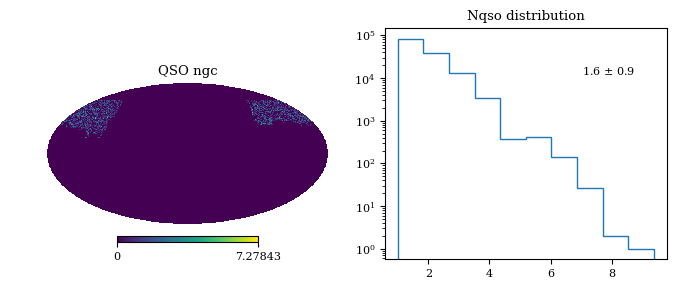

len of gal cats 1
num of gal obj 216893
projecting into a healpix map with nside of 512


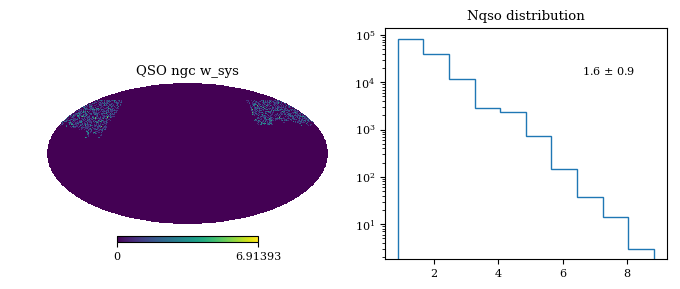

len of gal cats 1
num of gal obj 5565871
projecting into a healpix map with nside of 512
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_ngc_v6.ran.hp.512.fits already exists going to rewrite....


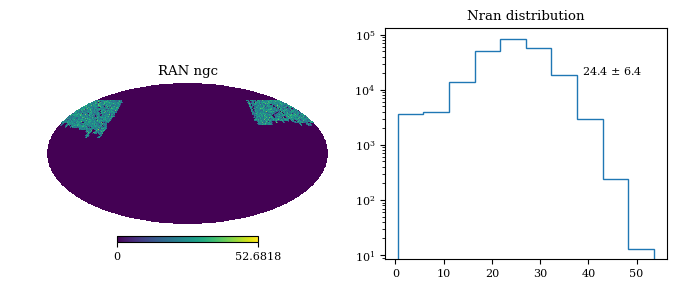

attributes : ('nran', 'sky_g', 'sky_r', 'sky_i', 'sky_z', 'airmass', 'ebv', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'w1_med', 'w1_covmed', 'w1_moon', 'star_density')
total mask ran > 0 : 237261
total mask after nan maps : 237220
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145728 entries, 0 to 3145727
Data columns (total 20 columns):
ngal            float64
nran            float64
mask            bool
sky_g           float64
sky_r           float64
sky_i           float64
sky_z           float64
depth_g         float64
depth_r         float64
depth_i         float64
depth_z         float64
psf_g           float64
psf_r           float64
psf_i           float64
psf_z           float64
w1_med          float64
w1_covmed       float64
star_density    float64
ebv             float64
airmass         float64
dtypes: bool(1), float64(19)
memory usage: 459.0 MB
Info :  None
/Volumes/TimeMachine/data/eboss/v6/qso_hpsyst_ngc.hf already exists going to

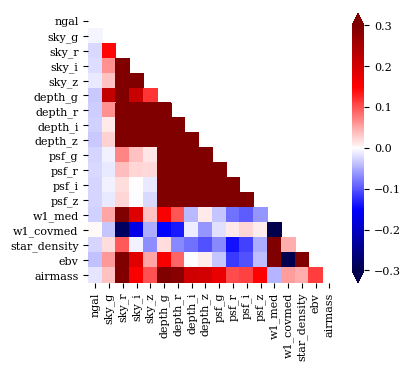

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


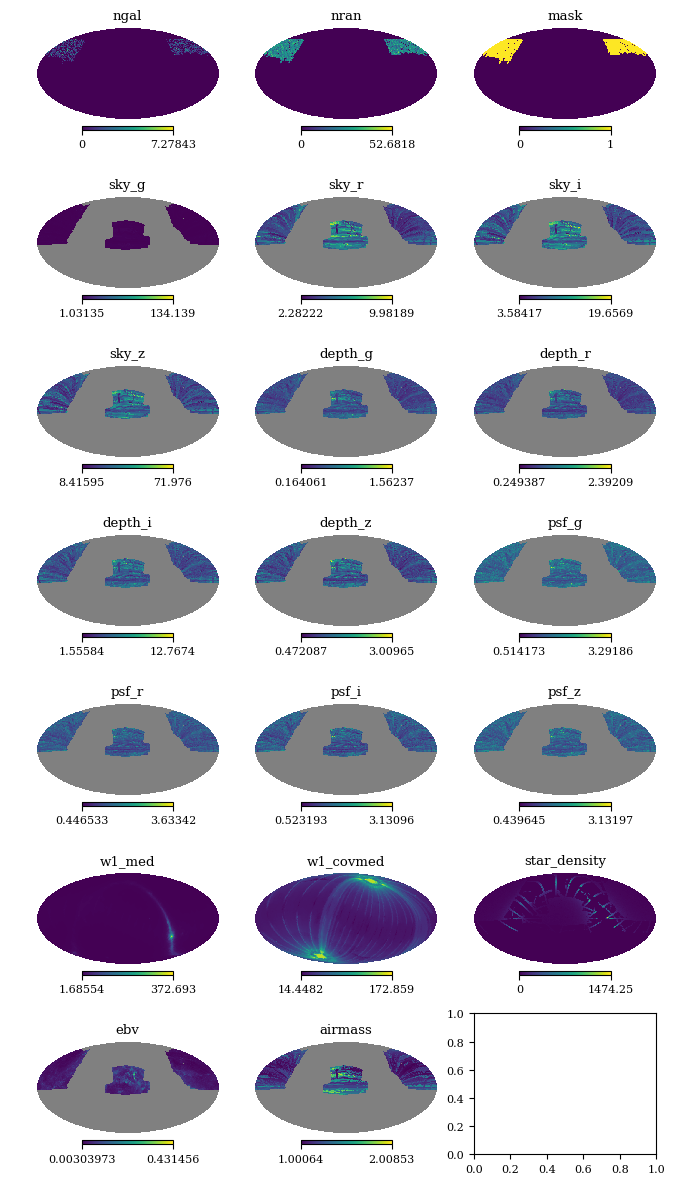

wrote /Volumes/TimeMachine/data/eboss/v6/ngal_features_ngc.fits
wrote /Volumes/TimeMachine/data/eboss/v6/mask.ngc.hp.512.fits
wrote /Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.hp.512.fits


In [4]:
# data
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_ngc_v6.dat.hp.512.fits')
qsocat.plot_hist(['QSO ngc', 'Nqso distribution'])

# data with systot
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits'], 
            weights=['weight_systot', 'weight_cp', 'weight_noz'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_ngc_wsys_v6.dat.hp.512.fits')
qsocat.plot_hist(['QSO ngc w_sys', 'Nqso distribution'])

# random
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_NGC_v6.ran.fits'],
             weights=['weight_systot', 'weight_cp', 'weight_noz'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_ngc_v6.ran.hp.512.fits')
qsocat.plot_hist(['RAN ngc', 'Nran distribution'])


# combine data, random, and imaging attributes
COLS = ['sky_g', 'sky_r', 'sky_i', 'sky_z', 
        'depth_g', 'depth_r', 'depth_i','depth_z',
        'psf_g','psf_r', 'psf_i', 'psf_z',
        'w1_med', 'w1_covmed',
        'star_density', 'ebv', 'airmass']

pdm = combinemaps(scratch+'eboss/v6/eBOSS_QSO_clustering_ngc_v6.dat.hp.512.fits',
                  scratch+'eboss/v6/eBOSS_QSO_clustering_ngc_v6.ran.hp.512.fits',
                  scratch +'/eboss/sysmaps/SDSS_WISE_imageprop_nside512.fits')
pdm.maketable(cols=COLS)
pdm.to_hdf(scratch+'eboss/v6/qso_hpsyst_ngc.hf', 'qso_hpsyst', mode='w', format='fixed')
pdm.plot_corrmax([-.3, .3])
pdm.plot_mollweide()

# read hdf, write label, features to fits
fitname = '/Volumes/TimeMachine/data/eboss/v6/ngal_features_ngc.fits'
metaname = '/Volumes/TimeMachine/data/eboss/v6/qso_hpsyst_ngc.hf'
hpmask   = '/Volumes/TimeMachine/data/eboss/v6/mask.ngc.hp.512.fits'
hpfrac   = '/Volumes/TimeMachine/data/eboss/v6/fracgood.ngc.hp.512.fits'
hd5_2_fits(metaname, fitname, hpmask, hpfrac, COLS)

# randomly split the label features into 5 partitions
ut.read_split_write('/Volumes/TimeMachine/data/eboss/v6/ngal_features_ngc.fits', 
                   '/Volumes/TimeMachine/data/eboss/v6/qso.ngc.hp.512.r',
                   5)

### SGC

len of gal cats 1
num of gal obj 125501
projecting into a healpix map with nside of 512


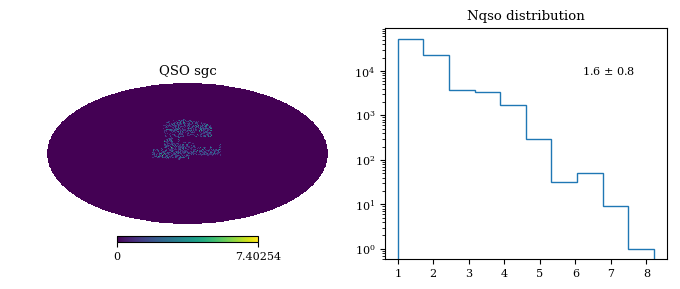

len of gal cats 1
num of gal obj 125501
projecting into a healpix map with nside of 512


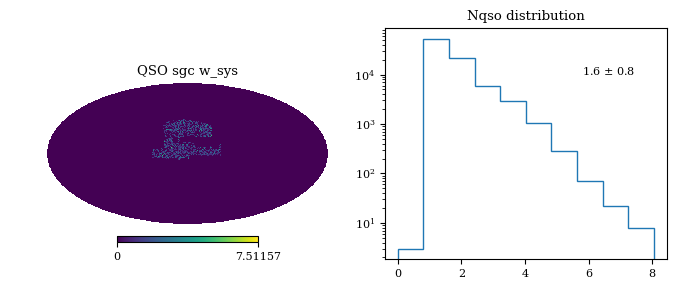

len of gal cats 1
num of gal obj 3587326
projecting into a healpix map with nside of 512


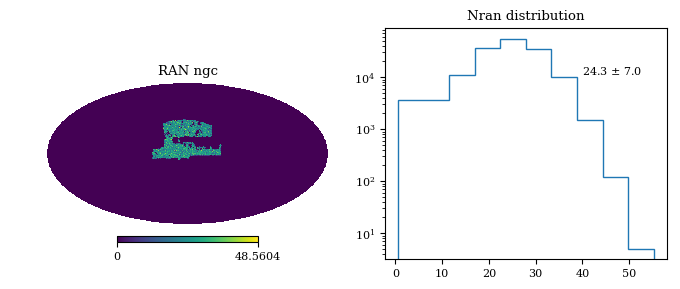

attributes : ('nran', 'sky_g', 'sky_r', 'sky_i', 'sky_z', 'airmass', 'ebv', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'w1_med', 'w1_covmed', 'w1_moon', 'star_density')
total mask ran > 0 : 155323
total mask after nan maps : 155282
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145728 entries, 0 to 3145727
Data columns (total 20 columns):
ngal            float64
nran            float64
mask            bool
sky_g           float64
sky_r           float64
sky_i           float64
sky_z           float64
depth_g         float64
depth_r         float64
depth_i         float64
depth_z         float64
psf_g           float64
psf_r           float64
psf_i           float64
psf_z           float64
w1_med          float64
w1_covmed       float64
star_density    float64
ebv             float64
airmass         float64
dtypes: bool(1), float64(19)
memory usage: 459.0 MB
Info :  None



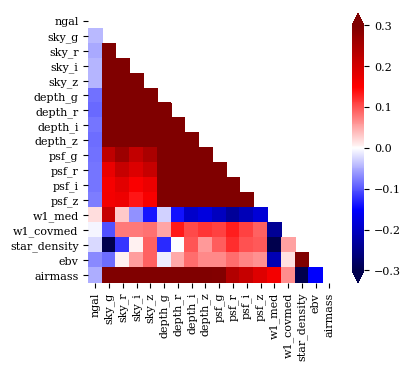

/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


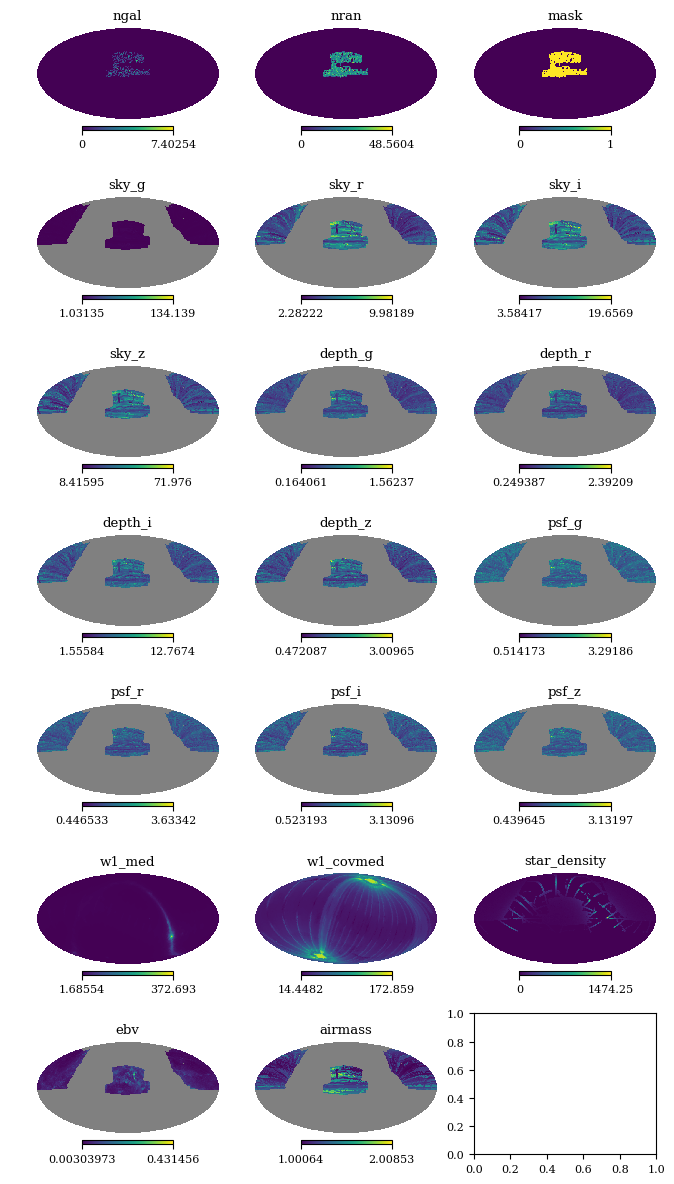

wrote /Volumes/TimeMachine/data/eboss/v6/ngal_features_sgc.fits
wrote /Volumes/TimeMachine/data/eboss/v6/mask.sgc.hp.512.fits
wrote /Volumes/TimeMachine/data/eboss/v6/fracgood.sgc.hp.512.fits


In [5]:
# data
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_sgc_v6.dat.hp.512.fits')
qsocat.plot_hist(['QSO sgc', 'Nqso distribution'])

# data with systot
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits'], 
            weights=['weight_systot', 'weight_cp', 'weight_noz'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_sgc_wsys_v6.dat.hp.512.fits')
qsocat.plot_hist(['QSO sgc w_sys', 'Nqso distribution'])

# random
qsocat = CAT([scratch+'eboss/v6/eBOSS_QSO_clustering_SGC_v6.ran.fits'],
             weights=['weight_systot', 'weight_cp', 'weight_noz'])
qsocat.project2hp()
qsocat.writehp(scratch+'eboss/v6/eBOSS_QSO_clustering_sgc_v6.ran.hp.512.fits')
qsocat.plot_hist(['RAN ngc', 'Nran distribution'])

# combine data, random, and imaging attributes
COLS = ['sky_g', 'sky_r', 'sky_i', 'sky_z', 
        'depth_g', 'depth_r', 'depth_i','depth_z',
        'psf_g','psf_r', 'psf_i', 'psf_z',
        'w1_med', 'w1_covmed',
        'star_density', 'ebv', 'airmass']

pdm = combinemaps(scratch+'eboss/v6/eBOSS_QSO_clustering_sgc_v6.dat.hp.512.fits',
                  scratch+'eboss/v6/eBOSS_QSO_clustering_sgc_v6.ran.hp.512.fits',
                  scratch +'/eboss/sysmaps/SDSS_WISE_imageprop_nside512.fits')
pdm.maketable(cols=COLS)
pdm.to_hdf(scratch+'eboss/v6/qso_hpsyst_sgc.hf', 'qso_hpsyst', mode='w', format='fixed')
pdm.plot_corrmax([-.3, .3])
pdm.plot_mollweide()

# read hdf, write label, features to fits
fitname = '/Volumes/TimeMachine/data/eboss/v6/ngal_features_sgc.fits'
metaname = '/Volumes/TimeMachine/data/eboss/v6/qso_hpsyst_sgc.hf'
hpmask   = '/Volumes/TimeMachine/data/eboss/v6/mask.sgc.hp.512.fits'
hpfrac   = '/Volumes/TimeMachine/data/eboss/v6/fracgood.sgc.hp.512.fits'
hd5_2_fits(metaname, fitname, hpmask, hpfrac, COLS)

# randomly split the label features into 5 partitions
ut.read_split_write('/Volumes/TimeMachine/data/eboss/v6/ngal_features_sgc.fits', 
                   '/Volumes/TimeMachine/data/eboss/v6/qso.sgc.hp.512.r',
                   5)

## Ablation

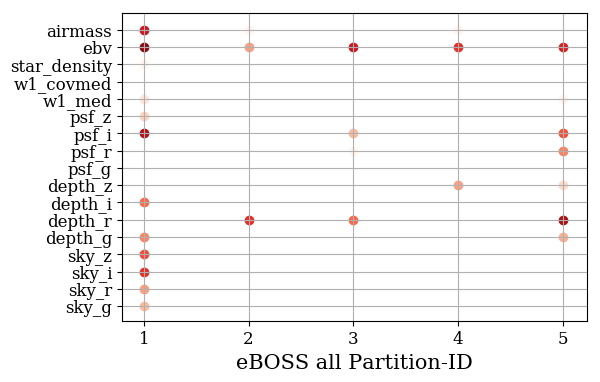

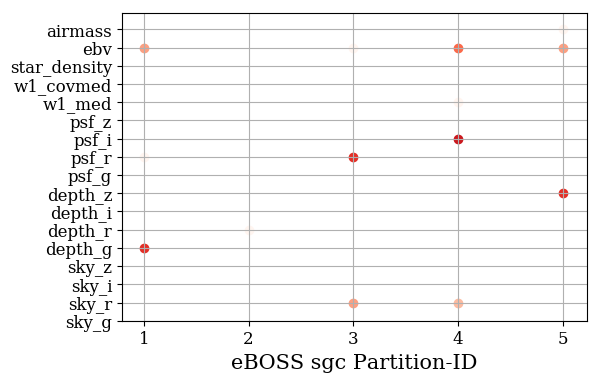

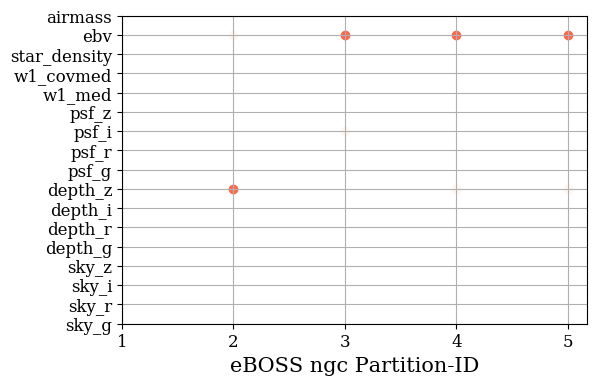

In [2]:
for cap in ['all', 'sgc', 'ngc']:
    hyper_params_data(glob('/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/ablation/v6.log_fold*.npy'), ['eBOSS '+cap])

In [4]:
nns  = glob('/Volumes/TimeMachine/data/eboss/v6/results_/regression/*/nn-weights.hp512.fits')
masks = glob('/Volumes/TimeMachine/data/eboss/v6/mask.*.hp.512.fits')
nns, masks

(['/Volumes/TimeMachine/data/eboss/v6/results_all/regression/nn_ab/nn-weights.hp512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_all/regression/nn_p/nn-weights.hp512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc/regression/nn_ab/nn-weights.hp512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_ngc/regression/nn_p/nn-weights.hp512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_sgc/regression/nn_ab/nn-weights.hp512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/results_sgc/regression/nn_p/nn-weights.hp512.fits'],
 ['/Volumes/TimeMachine/data/eboss/v6/mask.all.cut.hp.512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/mask.all.hp.512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/mask.ngc.cut.hp.512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/mask.ngc.hp.512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/mask.sgc.cut.hp.512.fits',
  '/Volumes/TimeMachine/data/eboss/v6/mask.sgc.hp.512.fits'])

/Volumes/TimeMachine/data/eboss/v6/results/regression/mult_all/lin-weights.hp512.fits
0.44903991209073535 1.3676287426929763
/Volumes/TimeMachine/data/eboss/v6/results/regression/mult_all/quad-weights.hp512.fits
0.37080637803528593 1.5176027062319724
/Volumes/TimeMachine/data/eboss/v6/results/regression/nn_ab/nn-weights.hp512.fits
0.31029618263812286 1.2271591165416917
/Volumes/TimeMachine/data/eboss/v6/results/regression/nn_p/nn-weights.hp512.fits
-0.1362557086903159 3.003935694171566


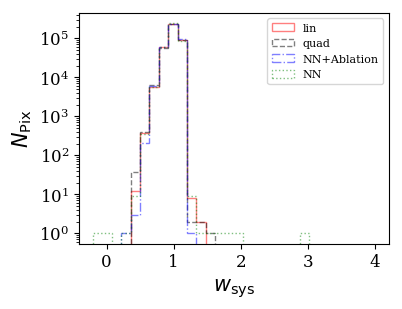

In [4]:
mpl.rcParams.update(mpl.rcParamsDefault)
params = {
'axes.spines.right':True,
'axes.spines.top':True,
'axes.labelsize': 15,
#'text.fontsize': 8,
'legend.fontsize': 8,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'text.usetex': False,
'figure.figsize': [4, 3],
'font.family':'serif',
'font.size':12
}    
plt.rcParams.update(params) 
ls = ['-', '--', '-.', ':']
lt = ['lin', 'quad', 'NN+Ablation', 'NN']
cl = ['r', 'k', 'b', 'g']
for i,nni in enumerate(nns):
    print(nni)
    nnd = hp.read_map(nni, verbose=False)[mask]
    print(nnd.min(), nnd.max())
    plt.hist(nnd, range=(-0.2, 4), 
             alpha=0.5, bins=30, histtype='step',
             linestyle=ls[i], label=lt[i], color=cl[i])
plt.yscale('log')
plt.ylabel(r'$N_{\rm Pix}$')
plt.xlabel(r'$w_{\rm sys}$')
plt.legend()
_=plt.show()

In [6]:
kw = {'verbose':False}
ngal = hp.read_map('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_all_v6.dat.hp.512.fits', **kw)
mask = hp.read_map('/Volumes/TimeMachine/data/eboss/v6/mask.hp.512.fits', **kw).astype('bool')
frac = hp.read_map('/Volumes/TimeMachine/data/eboss/v6/fracgood.hp.512.fits', **kw)
nnw  = hp.read_map('/Volumes/TimeMachine/data/eboss/v6/results/regression/nn_ab/nn-weights.hp512.fits', **kw)

In [7]:
nnbar  = ut.makedelta(ngal, weight1=frac, mask=mask) + 1.0
nnw    = nnw / np.mean(nnw[mask])

# nnw[~mask] = np.mean(nnw[mask])
# nnw = hp.smoothing(nnw.copy(), sigma=np.deg2rad(0.1))
nnbarc = ut.makedelta(ngal, weight1=frac, mask=mask, select_fun=nnw) + 1.0

/Users/rezaie/github/SYSNet/src/utils.py:139: RuntimeWarning: divide by zero encountered in true_divide
  gmap = map1 / select_fun
/Users/rezaie/github/SYSNet/src/utils.py:139: RuntimeWarning: invalid value encountered in true_divide
  gmap = map1 / select_fun


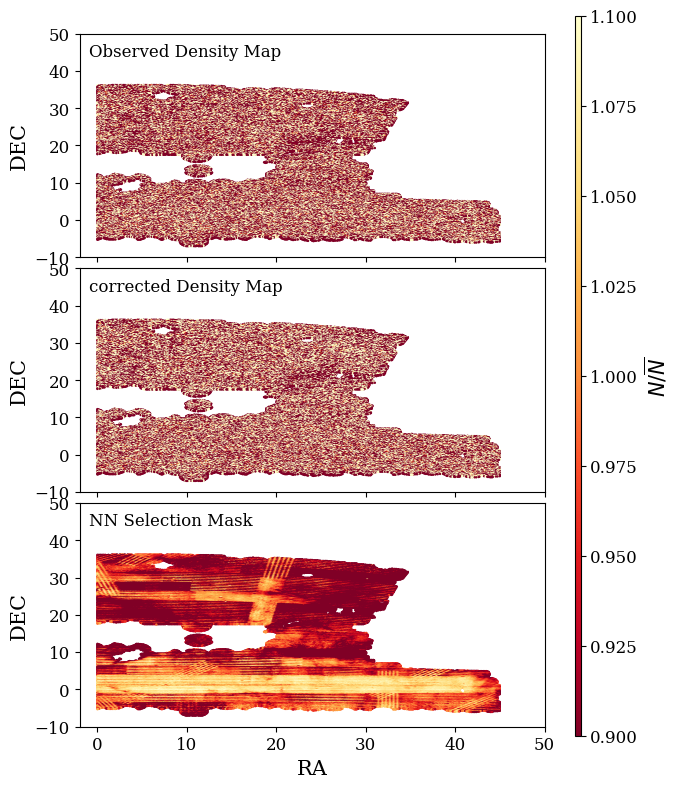

In [8]:
# plt.rc('axes.spines', top=False, right=False)
# plt.rc('font', family='serif')
# plt.rc('text', usetex=True)
hpix = np.argwhere(mask).flatten()
fig, ax = plt.subplots(nrows=3, figsize=(6, 9), sharex=True)
plt.subplots_adjust(hspace=0.05)


#ttl = ['No weights', 'Linear weights', 'NN weights']
ttl = ['Observed Density Map', 'corrected Density Map','NN Selection Mask', ]
#for i,di in enumerate([duni, dlin, dnn]):
for i,di in enumerate([nnbar, nnbarc, nnw]):
    radec = ut.hpix2radec(512, hpix)
    map1 = ax[i].scatter(radec[0], radec[1], 0.5, 
                         #c=5*di[mask], vmin=-1, vmax=1.,
                        c=di[mask], vmin=0.9, vmax=1.1,
                        cmap=plt.cm.YlOrRd_r)
    ax[i].text(0.02, 0.9, ttl[i], transform=ax[i].transAxes)
    ax[-1].set_xlabel('RA')
    ax[i].set_ylabel('DEC')
    ax[i].axis([-2, 50, -10., 50.])
cax = plt.axes([.95, 0.1, 0.01, 0.8])
fig.colorbar(map1, cax=cax, label=r'$N/\overline{N}$')
plt.show()
# plt.savefig('./deltas.png', bbox_inches='tight', dpi=300)

In [23]:
!ls /Volumes/TimeMachine/data/eboss/v6/results_all/clustering

cl_lin.log         cl_sys.png         nnbar_nn_p.npy     xi_nn_ab.npy
cl_lin.npy         cl_uni.log         nnbar_nn_p.png     xi_nn_p.log
cl_lin.png         cl_uni.npy         nnbar_quad.log     xi_nn_p.npy
cl_nn_ab.log       cl_uni.png         nnbar_quad.npy     xi_quad.log
cl_nn_ab.npy       cl_uni_wsys.log    nnbar_quad.png     xi_quad.npy
cl_nn_ab.png       cl_uni_wsys.npy    nnbar_uni.log      xi_sys.log
cl_nn_p.log        cl_uni_wsys.png    nnbar_uni.npy      xi_sys.npy
cl_nn_p.npy        nnbar_lin.log      nnbar_uni.png      xi_uni.log
cl_nn_p.png        nnbar_lin.npy      nnbar_uni_wsys.log xi_uni.npy
cl_quad.log        nnbar_lin.png      nnbar_uni_wsys.npy xi_uni_wsys.log
cl_quad.npy        nnbar_nn_ab.log    nnbar_uni_wsys.png xi_uni_wsys.npy
cl_quad.png        nnbar_nn_ab.npy    xi_lin.log
cl_sys.log         nnbar_nn_ab.png    xi_lin.npy
cl_sys.npy         nnbar_nn_p.log     xi_nn_ab.log


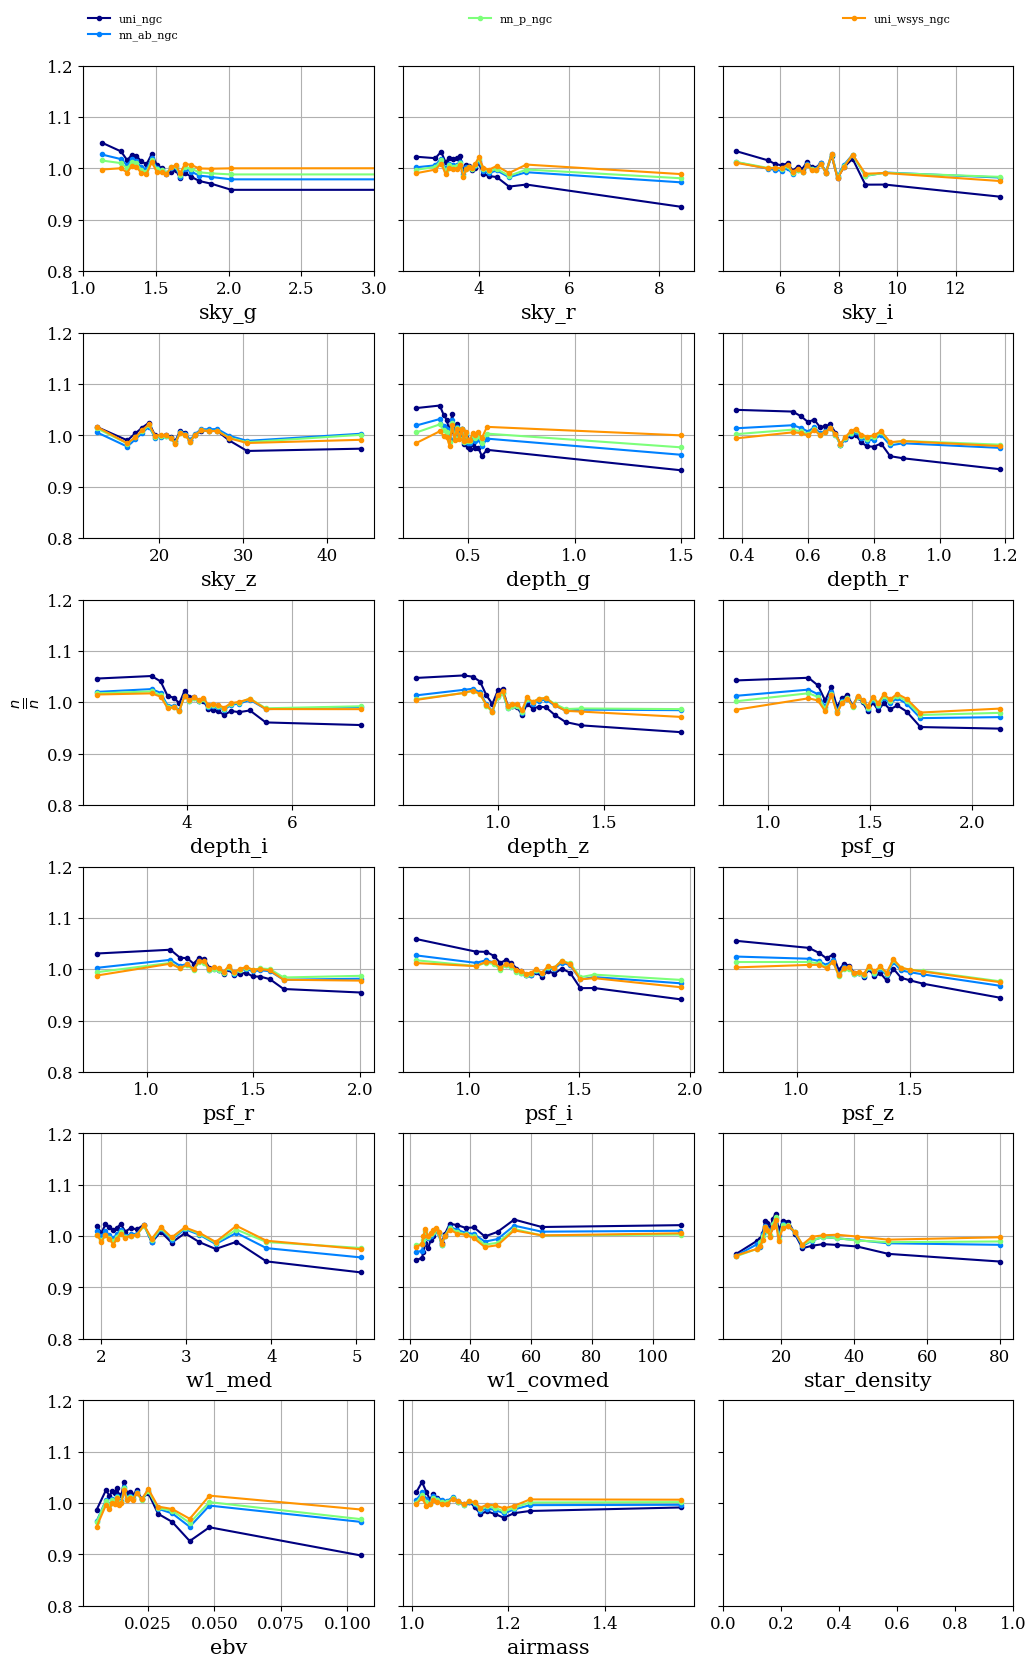

In [37]:
nnbars = glob('/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_uni.npy')\
       + glob('/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_nn_*.npy')\
       + glob('/Volumes/TimeMachine/data/eboss/v6/results_ngc/clustering/nnbar_uni_wsys.npy')
print(nnbars)

mpl.rcParams.update(mpl.rcParamsDefault)
params = {
'axes.spines.right':True,
'axes.spines.top':True,
'axes.labelsize': 15,
#'text.fontsize': 8,
'legend.fontsize': 8,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'text.usetex': False,
'figure.figsize': [4, 3],
'font.family':'serif',
'font.size':12
}    
plt.rcParams.update(params) 

fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(12, 20), sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0.1)
ax = ax.flatten()

#lt = ['lin', 'NN+Ablation', 'NN', 'quad', 'No Correction']
#cl = ['r', 'b', 'k', 'g', 'purple']
ls = ['--', ':', '-', '-.', '-']
n  = len(nnbars)
cl  = plt.cm.jet
for j,nnbar_i in enumerate(nnbars):
    nnbar = np.load(nnbar_i).item()
    lt = '_'.join((nnbar_i.split('/')[-1].split('.')[0][6:], nnbar_i.split('/')[6].split('_')[-1]))
    for i in range(len(nnbar['nnbar'])):
        mynnb = nnbar['nnbar'][i]
        x = 0.5*(mynnb['bin_edges'][1:]+mynnb['bin_edges'][:-1])
        y = mynnb['nnbar']
        ye = mynnb['nnbar_err']
        ax[i].plot(x, y, marker='.', color=cl(j/n), label=lt)
        if j ==n-1:
            ax[0].legend(**dict(ncol=3,frameon=False,
                 bbox_to_anchor=(0, 1.1, 3, 0.4), loc="lower left",
                mode="expand", borderaxespad=0))
            ax[0].set_xlim(1, 3)
            ax[i].set_ylim(0.8, 1.2)
            ax[i].set_xlabel(nnbar['xlabels'][i])
            ax[i].grid()
            if i==6:ax[i].set_ylabel(r'$\frac{n}{\overline{n}}$')
plt.show()                

In [20]:
kw   = dict(verbose=False)
frac = hp.read_map('/Volumes/TimeMachine/data/eboss/v6/fracgood.hp.512.fits', **kw)
mask = hp.read_map('/Volumes/TimeMachine/data/eboss/v6/mask.cut.hp.512.fits', **kw).astype('bool')
ngal = hp.read_map('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_all_v6.dat.hp.512.fits', **kw)

area = hp.nside2pixarea(512, degrees=True)*frac[mask].sum()*3.0462e-4
shotnoise = area/ngal[mask].sum()
print('shotnoise,', area/ngal[mask].sum())
print('fsky', frac[mask].sum()/mask.size)

shotnoise, 4.295060549836234e-06
fsky 0.12477026862386136


In [38]:
def plot_clxi(filen, filen2, ax, ttl):    
    mpl.rcParams.update(mpl.rcParamsDefault)
    params = {
    'axes.spines.right':True,
    'axes.spines.top':True,
    'axes.labelsize': 15,
    #'text.fontsize': 8,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [4, 3],
    'font.family':'serif',
    'font.size':12
    }    
    plt.rcParams.update(params) 

    lb = ['uni', 'uni_wsys', 'nn_ab']
    lt = ['no correction', 'systot', 'nn']
    c  = ['k', 'royalblue', 'crimson', 'g', '', 'purple']
    ls = ['-', '--', '-', '-.', '', '-']

#     fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
#     plt.subplots_adjust(wspace=0.4)

    kw = dict(bins=np.logspace(np.log10(0.9), np.log10(1030), 10))
    for i,lbi in enumerate(lb):
        cl = np.load(filen(lbi)).item()
        elb, clbe = ut.binit_jac(cl['clerr']['cljks'], **kw)
        elb, clb  = ut.binit(np.arange(cl['auto'].size), cl['auto']-4.295060549836234e-6, **kw)
        #print(clb)
        ax[0].errorbar(elb, clb, yerr=clbe, marker='.', linestyle=ls[i], color=c[i], label=lt[i])
    ax[0].legend(title=ttl)
    ax[0].loglog()
    ax[0].set_ylim(1.e-7, 1.e-2)
    ax[0].set_xlabel(r'$\ell$')
    ax[0].set_ylabel(r'$C_{\ell}$')

    fc = 1.e2
    for i, xii in enumerate(lb):
        d = np.load(filen2(xii)).item()['auto']
        t  = 0.5*np.degrees(d['t'][1:]+d['t'][:-1])
        xi = fc*(d['w']-d['dmean']*d['dmean'])

        xierr=d['werr']
        ax[1].errorbar(t, xi, yerr=fc*xierr, linestyle=ls[i], color=c[i], label=lt[i])
        #ax[0].legend(bbox_to_anchor=(0, 1.1, 2, 0.4), loc="lower left",
        #            mode="expand", borderaxespad=0, ncol=3, frameon=False)    
        ax[1].set_xlabel(r'$\theta [deg]$')
        ax[1].set_ylabel(r'$10^{2}\times \omega(\theta)$')
        ax[1].set_xlim(-0.2, 10)
        ax[1].set_ylim(-0.5, 2.0)
        ax[1].grid()
    #plt.show()
    
    


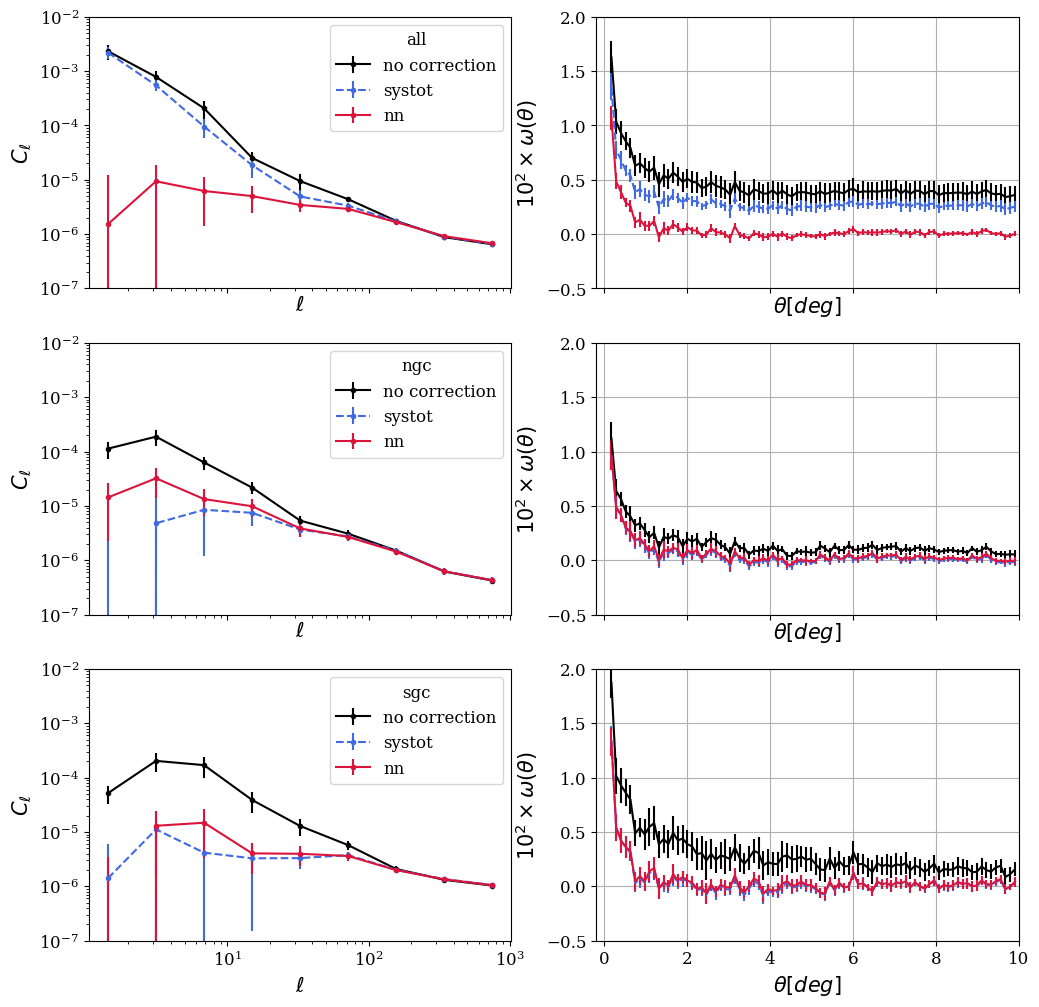

In [39]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), sharex='col')
ax = ax.flatten()
# plt.subplots_adjust(hspace=0.0)

for i,cap in enumerate(['all', 'ngc', 'sgc']):
    filen = lambda l:'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/cl_'+l+'.npy'
    filen2 = lambda l:'/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/xi_'+l+'.npy'
    plot_clxi(filen, filen2, [ax[2*i], ax[2*i+1]], cap)
plt.show()    